# Описание задания

Выберите один из предложенных датасетов (либо свой) и проделайте следующие шаги:

1. Разведочный анализ данных (EDA)
	- Подсчет пропусков и выявление аномалий.
	- Визуализация распределения признаков (гистограммы, боксплоты и так далее).
	- Анализ корреляции между признаками.
	- Сделайте выводы из анализа, выберите целевую переменную, сформулируйте гипотезу.

2. Предобработка данных
	- Очистите данные: обработайте пропуски, выбросы и категориальные переменные.
	- Нормализуйте и/или стандартизируйте данные, если это необходимо.

3. Построение моделей машинного обучения
	- Выберите как минимум три различных алгоритма машинного обучения (например, логистическую регрессию, решающие деревья, случайный лес, градиентный бустинг и так далее).
	- Обучите модели на тренировочных данных, используя кросс-валидацию для оценки их производительности.

4. Оценка моделей
	- Оцените качество построенных моделей с помощью метрик, которые были рассмотрены на занятиях (точность, полнота, F1-мера и ROC-AUC и так далее).
	- Сравните результаты моделей и выберите наилучшую по производительности.

5. Подбор гиперпараметров
	- Оптимизируйте производительность моделей путем подбора гиперпараметров.

6. Оценка важности признаков
	- Проанализируйте важность признаков для одной выбранной модели.

7. Заключение
	- Сформулируйте выводы на основе полученных результатов и дайте рекомендации по дальнейшим шагам в исследовании или практике.**

# Требования к оформлению проекта

Проект должен быть оформлен в виде блокнота с кодом на Python.

1. Введение
	- Краткое изложение цели проекта.
	- Описание поставленных задач и используемых методов.

2. Структура кода
	- Основные ячейки кода должны содержать пояснения.
	- Используйте комментарии, чтобы уточнить сложные моменты и алгоритмы. Комментарии должны быть ясными и лаконичными.

3. Объяснение шагов
	- Объясните выбор используемых библиотек и методов.
	- Опишите процесс предобработки данных. Укажите, какие преобразования были выполнены и почему они необходимы.
	- При настройке гиперпараметров объясните выбранные параметры и причину их выбора.

4. Визуализация данных
	- Все графики и диаграммы должны сопровождаться поясняющим текстом.
	- Укажите, что именно иллюстрируют визуализации и как они помогают в анализе данных или оценке модели.

5. Результаты
	- Опишите результаты выполнения кода.
	- Объясните, какие выводы можно сделать из полученных результатов и как они связаны с первоначальными задачами.

6. Заключение
  - Подытожьте проделанную работу.

In [74]:
# работа с данными
import pandas as pd
import numpy as np
import missingno

# визуализация данных
import seaborn as sns
import matplotlib.pyplot as plt

# машинное обучение
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, average_precision_score, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from scipy import stats

In [75]:
df = pd.read_excel('data/app_data.xlsx')
df.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


## Опасание переменных
### Demographic / Other
- `Age` (Age, years) - Obtained from the date of birth | Continuous
- `Sex` (Sex) - Registered gender | Binary: female / male
- `Height` (Height, cm) - Patient’s height | Continuous
- `Weight` (Weight, kg) - Patient's weight | Continuous
- `BMI` (Body mass index (BMI), kg/m^2) - Measures body fat; patient's weight divided by the square of the height | Continuous
- `Length_of_Stay` (Length of stay, days) - Length of the stay in the hospital | Continuous

### Scoring
- `Alvarado_Score` (Alvarado score (AS), pts) - Patient's score according to the scoring system | Discrete
- `Pediatric_Appendicitis_Score` (Pediatric appendicitis score (PAS), pts) - Patient's score according to the scoring system | Discrete

### Clinical
- `Peritonitis` (Peritonitis/abdominal guarding) - Spasm of abdominal wall muscles detected on palpation, usually a result of inflammation | Categorical: no / localized / generalized
- `Migratory_Pain` (Migration of pain) - Abdominal pain; usually starts in epigastrium and moves to the right lower quadrant | Binary: no / yes
- `Lower_Right_Abd_Pain` (Tenderness in right lower quadrant (RLQ)) - Right iliac fossa pain detected on palpation | Binary: no / yes
- `Contralateral_Rebound_Tenderness` (Contralateral rebound tnderness) - A state in which pain of the contralateral side (usually, the right lower quadrant) is felt on the release of pressure (usually, in the left lower quadrant) over the abdomen | Binary: no / yes
- `Ipsilateral_Rebound_Tenderness` (Ipsilateral rebound tenderness) - A state in which pain of the ipsilateral side is felt on the release of pressure over the abdomen | Binary: no / yes
- `Coughing_Pain` (Cough tenderness) - Abdominal pain by forced cough | Binary: no / yes
- `Psoas_Sign` (Psoas sign) - Abdominal pain produced by extension of the hip | Binary: negative / positive
- `Nausea` (Nausea/vomiting) - Feeling of sickness/ejection of contents from stomach through the mouth | Binary: no / yes
- `Loss_of_Appetite` (Anorexia) - Loss of appetite | Binary: no / yes
- `Body_Temperature` (Body temperature, °C) - Measured by a thermometer placed in the rectum or in the auditory canal | Continuous
- `Dysuria` (Dysuria) - Pain or other difficulty during urination | Binary: no / yes
- `Stool` (Stool) - Characteristics of bowel movements | Categorical: normal / diarrhea /obstipation"

### Laboratory
- `WBC_Count` (White blood cell count (WBC), 10^3/µl) - The number of leucocytes in a unit volume of blood; inflammation parameter | Continuous
- `RBC_Count` (Red blood cell count (RBC), /pl) - The number of erythrocytes in a unit volume of bood | Continuous
- `Hemoglobin` (Hemoglobin, g/dl) - Hemoglobin level; a red protein in the red blood cells that contains iron and is responsible for transporting oxygen | Continuous
- `RDW` (Red cell distribution width (RDW), %) - A blood test that measures the differences in the volume and size of the erythrocytes | Continuous
- `Thrombocyte_Count` (Thrombocyte count, /nl) - The number of platelets in a unit volume of bood | Continuous
- `Neutrophil_Percentage` (Neutrophils, %) - Mature WBC in the granulocytic series | Continuous
- `Neutrophilia` (Neutrophilia, >= 75%) - Relative neutrophilic leucocytosis, often a result of a bacterial infection | Binary: no / yes
- `Segmented_Neutrophils` (Segmented neutrophils, %) - Most mature neutrophilic granulocytes present in circulating blood, increased during an inflammatory disorder | Continuous
- `CRP` (C-reactive protein (CRP), mg/l) - Protein produced by the liver, elevated in case of inflammation, infection, or injury | Continuous
- `Ketones_in_Urine` (Ketones in urine) - Presence of ketone bodies in urine, e.g. in case of anorexia | Categorical: no / + / ++ / +++
- `RBC_in_Urine` (Erythrocytes in urine) - Blood in urine | Categorical: neg: < 5 ery/µl / +: approx. 5-10 ery/µl / ++: approx. 25 ery/µl +++: approx. 50 ery/µl
- `WBC_in_Urine` (White blood cells in urine) - Leucocytes in urine, e.g., in case of infection | Categorical: no / + / ++ / +++

### Ultrasound
- `US_Performed` (Performed ultrasound (US)) - If an abdominal ultrasonography was performed or not | Binary: no / yes
- `Appendix_on_US` (Visibility of appendix) - Detectability of the vermiform appendix during sonographic examination | Binary: no / yes
- `Appendix_Diameter` (Appendix diameter, mm) - Maximal outer diameter of the appendix | Continuous
- `Free_Fluids` (Free intraperitoneal fluid) - Free fluids inside the abdomen | Binary: no / yes
- `Appendix_Wall_Layers` (Appendix layer structure) - Distribution and characteristics of appendix layers, e.g., irregular in case of an increasing inflammation | Binary: regular / irregular
- `Target_Sign` (Target sign) - Axial image of appendix with a fluid-filled center surrounded by echogenic mucosa and submucosa and hypoechoic muscularis | Binary: no / yes
"- `Perfusion` (Appendix perfusion) - Blood flow to the appendix wall | Categorical:
· unremarkable
· hypoperfused
· hyperperfused"
- `Surrounding_Tissue_Reaction` (Surrounding tissue reaction) - Inflammation signs in tissue (i.a. in omentum/fat tissue) surrounding appendix | Binary: no / yes
- `Pathological_Lymph_Nodes` (Pathological lymph nodes) - Enlarged and inflamed intra-abdominal lymph nodes | Binary: no / yes
- `Lymph_Node_Location` (Location of pathological lymph nodes) - The location of pathological lymph nodes in the abdomen / Free-form text (in German)
- `Bowel_Wall_Thickening` (Thickening of the bowel wall) - Edema of the intestinal wall, > 2-3 mm for small bowel wall thickening | Binary: no / yes
- `Ileus` (Ileus) - Sonographic signs of paralytic ileus (e.g., dilated intestinal loops, pendulum peristalsis or absence of peristalsis) | Binary: no / yes
- `Coprostasis` (Coprostasis) - Fecal impaction in the colon | Binary: no / yes
- `Meteorism` (Meteorism) - Accumulation of gas in the intestine | Binary: no / yes
- `Enteritis` (Enteritis) - Sonographic features of gastroenteritis, e.g. wall thickening of ileum, increased peristalsis | Binary: no / yes
- `Apendicolith` (Appendicolith) - Presence of fecalith in the appendix, e.g. acoustic shadow | Binary: no / yes
- `Perforation` (Perforation) - Signs of appendix perforation in US | Binary: no / yes
- `Appendicular_Abscess` (Appendicular abscess) - Appendiceal mass | Binary: no / yes
- `Abscess_Location` (Location of abscess) - Location of the abcess intraperitoneal / Free-form text (in German)
- `Conglomerate_of_Bowel_Loops` (Conglomerate of bowel loops) - Small intestine conglomerate as sign of intraperitoneal inflammation | Binary: no / yes
- `Gynecological_Findings` (Gynaecological findings) - Gynaecological abnormalities, e.g. cysts, ovarial torsion / Free-form text (in German)
- `NA` (Ultrasound images) - Snapshots from the abdominal ultrasound exams / Images in BMP format

### Diagnosis / Management / Severity
- `Diagnosis_Presumptive` (Presumptive diagnosis) - Patient's suspected diagnosis / Free-form text (in German)
- `Diagnosis` (Diagnosis) - Patient's diagnosis, histologically confirmed for operated patients. Conservatively managed patients were labelled as having appendicitis if they had an AS or PAS of ≥ 4 and an appendix diameter of ≥ 6 mm | Binary: no appendicitis / appendicitis
"- `Management` (Management) - Management of the patient assigned by a senior pediatric surgeon: operative (appendectomy: laparoscopic, open or conversion) or conservative (without antibiotics). In case of the secondary surgery after prior stay, the patient was labelled as operatively managed. | Categorical: conservative / primary surgical / secondary surgical
- `Severity` (Severity) - Severity of appendicitis: uncomplicated: subacute/ catharral, fibrosis; phlegmonous or complicated: gangrenous, perforated, abscessed | Binary: uncomplicated or no appendicitis / complicated appendicitis

# 1. Разведочный анализ данных (EDA)

In [76]:
# структура датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Management                        781 non-null    object 
 7   Severity                          781 non-null    object 
 8   Diagnosis_Presumptive             780 non-null    object 
 9   Diagnosis                         780 non-null    object 
 10  Alvarado_Score                    730 non-null    float64
 11  Paedriatic_Appendicitis_Score     730 non-null    float64
 12  Appendix

In [77]:
# проверка на дубликаты
df.duplicated().sum()

0

## Подсчет пропусков и выявление аномалий

In [78]:
# как найти кол-во пропусков (в процентах)
cols_null_percent = round(df.isnull().mean() * 100, ndigits=2)
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
display(cols_with_null)

Abscess_Location                    98.34
Gynecological_Findings              96.68
Conglomerate_of_Bowel_Loops         94.50
Segmented_Neutrophils               93.09
Ileus                               92.33
Perfusion                           91.94
Enteritis                           91.56
Appendicolith                       91.18
Coprostasis                         90.92
Perforation                         89.64
Appendicular_Abscess                89.13
Bowel_Wall_Thickening               87.34
Lymph_Nodes_Location                84.53
Target_Sign                         82.35
Meteorism                           82.10
Pathological_Lymph_Nodes            74.04
Appendix_Wall_Layers                72.12
Surrounding_Tissue_Reaction         67.77
Appendix_Diameter                   36.32
RBC_in_Urine                        26.34
Ketones_in_Urine                    25.58
WBC_in_Urine                        25.45
Ipsilateral_Rebound_Tenderness      20.84
Neutrophil_Percentage             

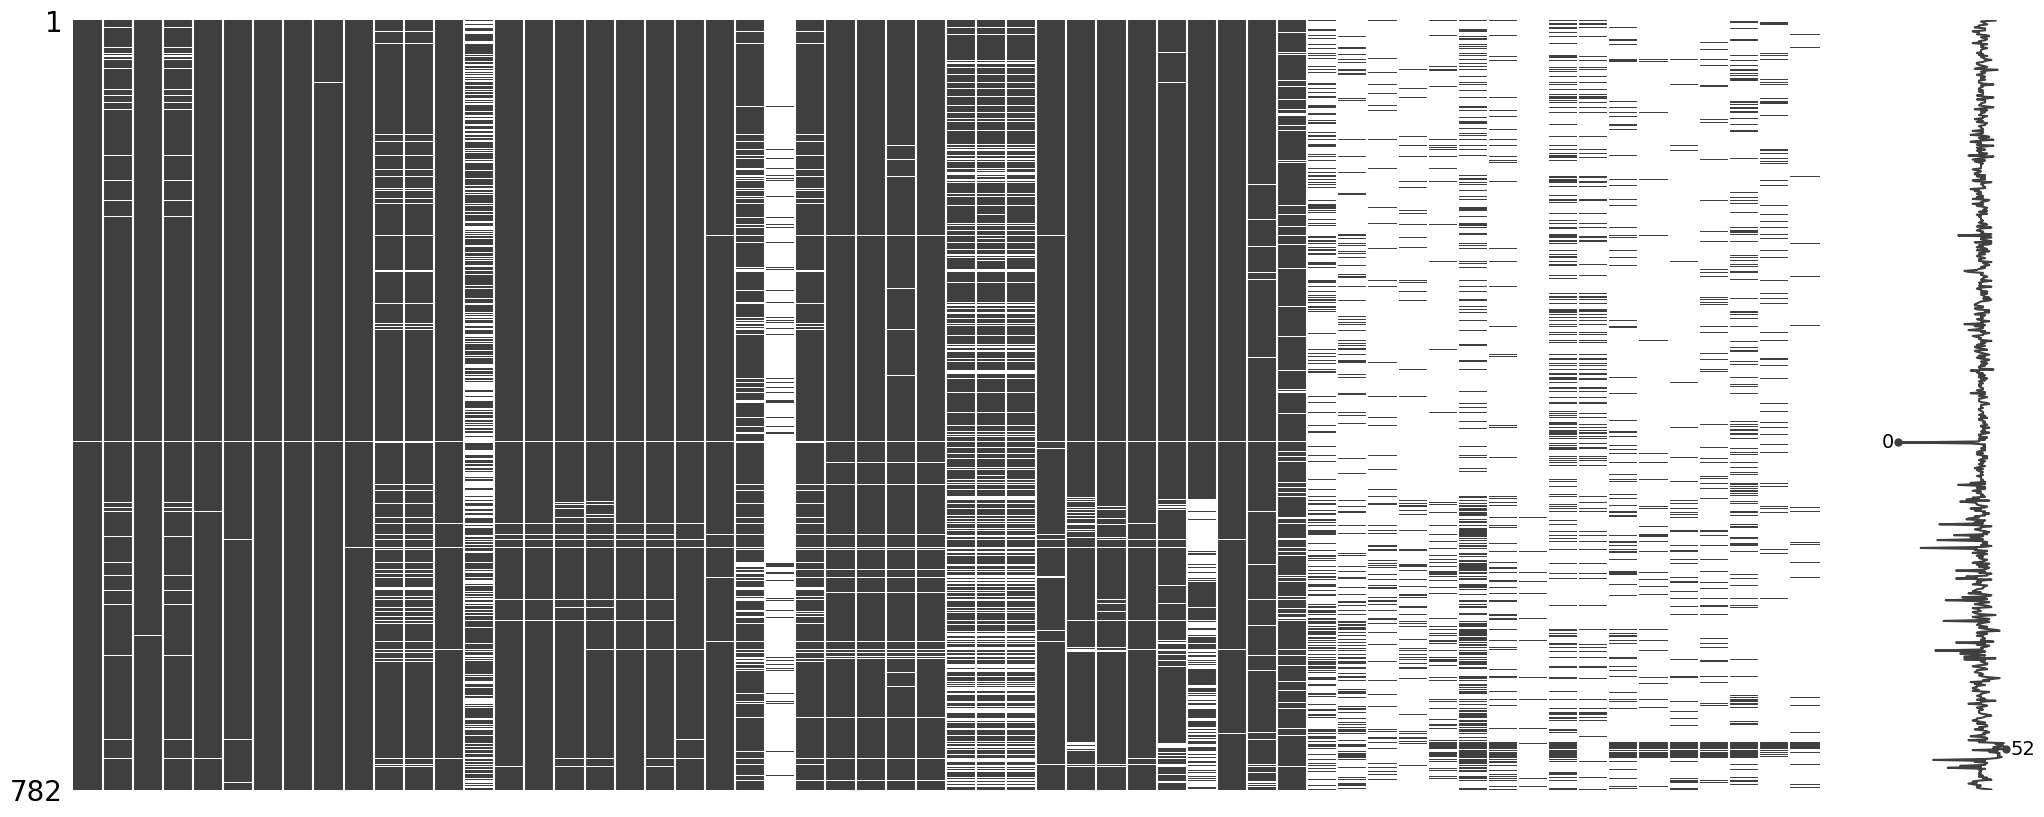

In [79]:
missingno.matrix(df);

> в данных есть фичи с большим количеством пропусков, от них в дальнейшем лучше избавиться.

In [80]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,781.0,11.35,3.53,0.00,9.20,11.44,14.10,18.36
BMI,755.0,18.91,4.39,7.83,15.73,18.06,21.18,38.16
Height,756.0,148.02,19.73,53.00,137.00,149.65,163.00,192.00
Weight,779.0,43.17,17.39,3.96,29.50,41.40,54.00,103.00
Length_of_Stay,778.0,4.28,2.57,1.00,3.00,3.00,5.00,28.00
Alvarado_Score,730.0,5.92,2.16,0.00,4.00,6.00,8.00,10.00
Paedriatic_Appendicitis_Score,730.0,5.25,1.96,0.00,4.00,5.00,7.00,10.00
Appendix_Diameter,498.0,7.76,2.54,2.70,6.00,7.50,9.10,17.00
Body_Temperature,775.0,37.40,0.90,26.90,36.80,37.20,37.90,40.20
WBC_Count,776.0,12.67,5.37,2.60,8.20,12.00,16.20,37.70


> числовые переменные содержат некоторое кол-во аномальных значений (например `Age` = 0, RDW, Hemoglobin), от них так же в дальнейшем следует избавиться

In [81]:
df.describe(include='object').T

,count,unique,top,freq
Sex,780,2,male,403
Management,781,4,conservative,483
Severity,781,2,uncomplicated,662
Diagnosis_Presumptive,780,16,appendicitis,682
Diagnosis,780,2,appendicitis,463
Appendix_on_US,777,2,yes,504
Migratory_Pain,773,2,no,562
Lower_Right_Abd_Pain,774,2,yes,733
Contralateral_Rebound_Tenderness,767,2,no,469
Coughing_Pain,766,2,no,548


In [82]:
# составляем списки с числовыми и категориальными переменными
column_target = "Diagnosis"
columns_num = df.select_dtypes(include=['number']).columns
columns_obj = df.select_dtypes(include=['object']).columns.drop(column_target)

## Визуализация распределения признаков (гистограммы, боксплоты и так далее).

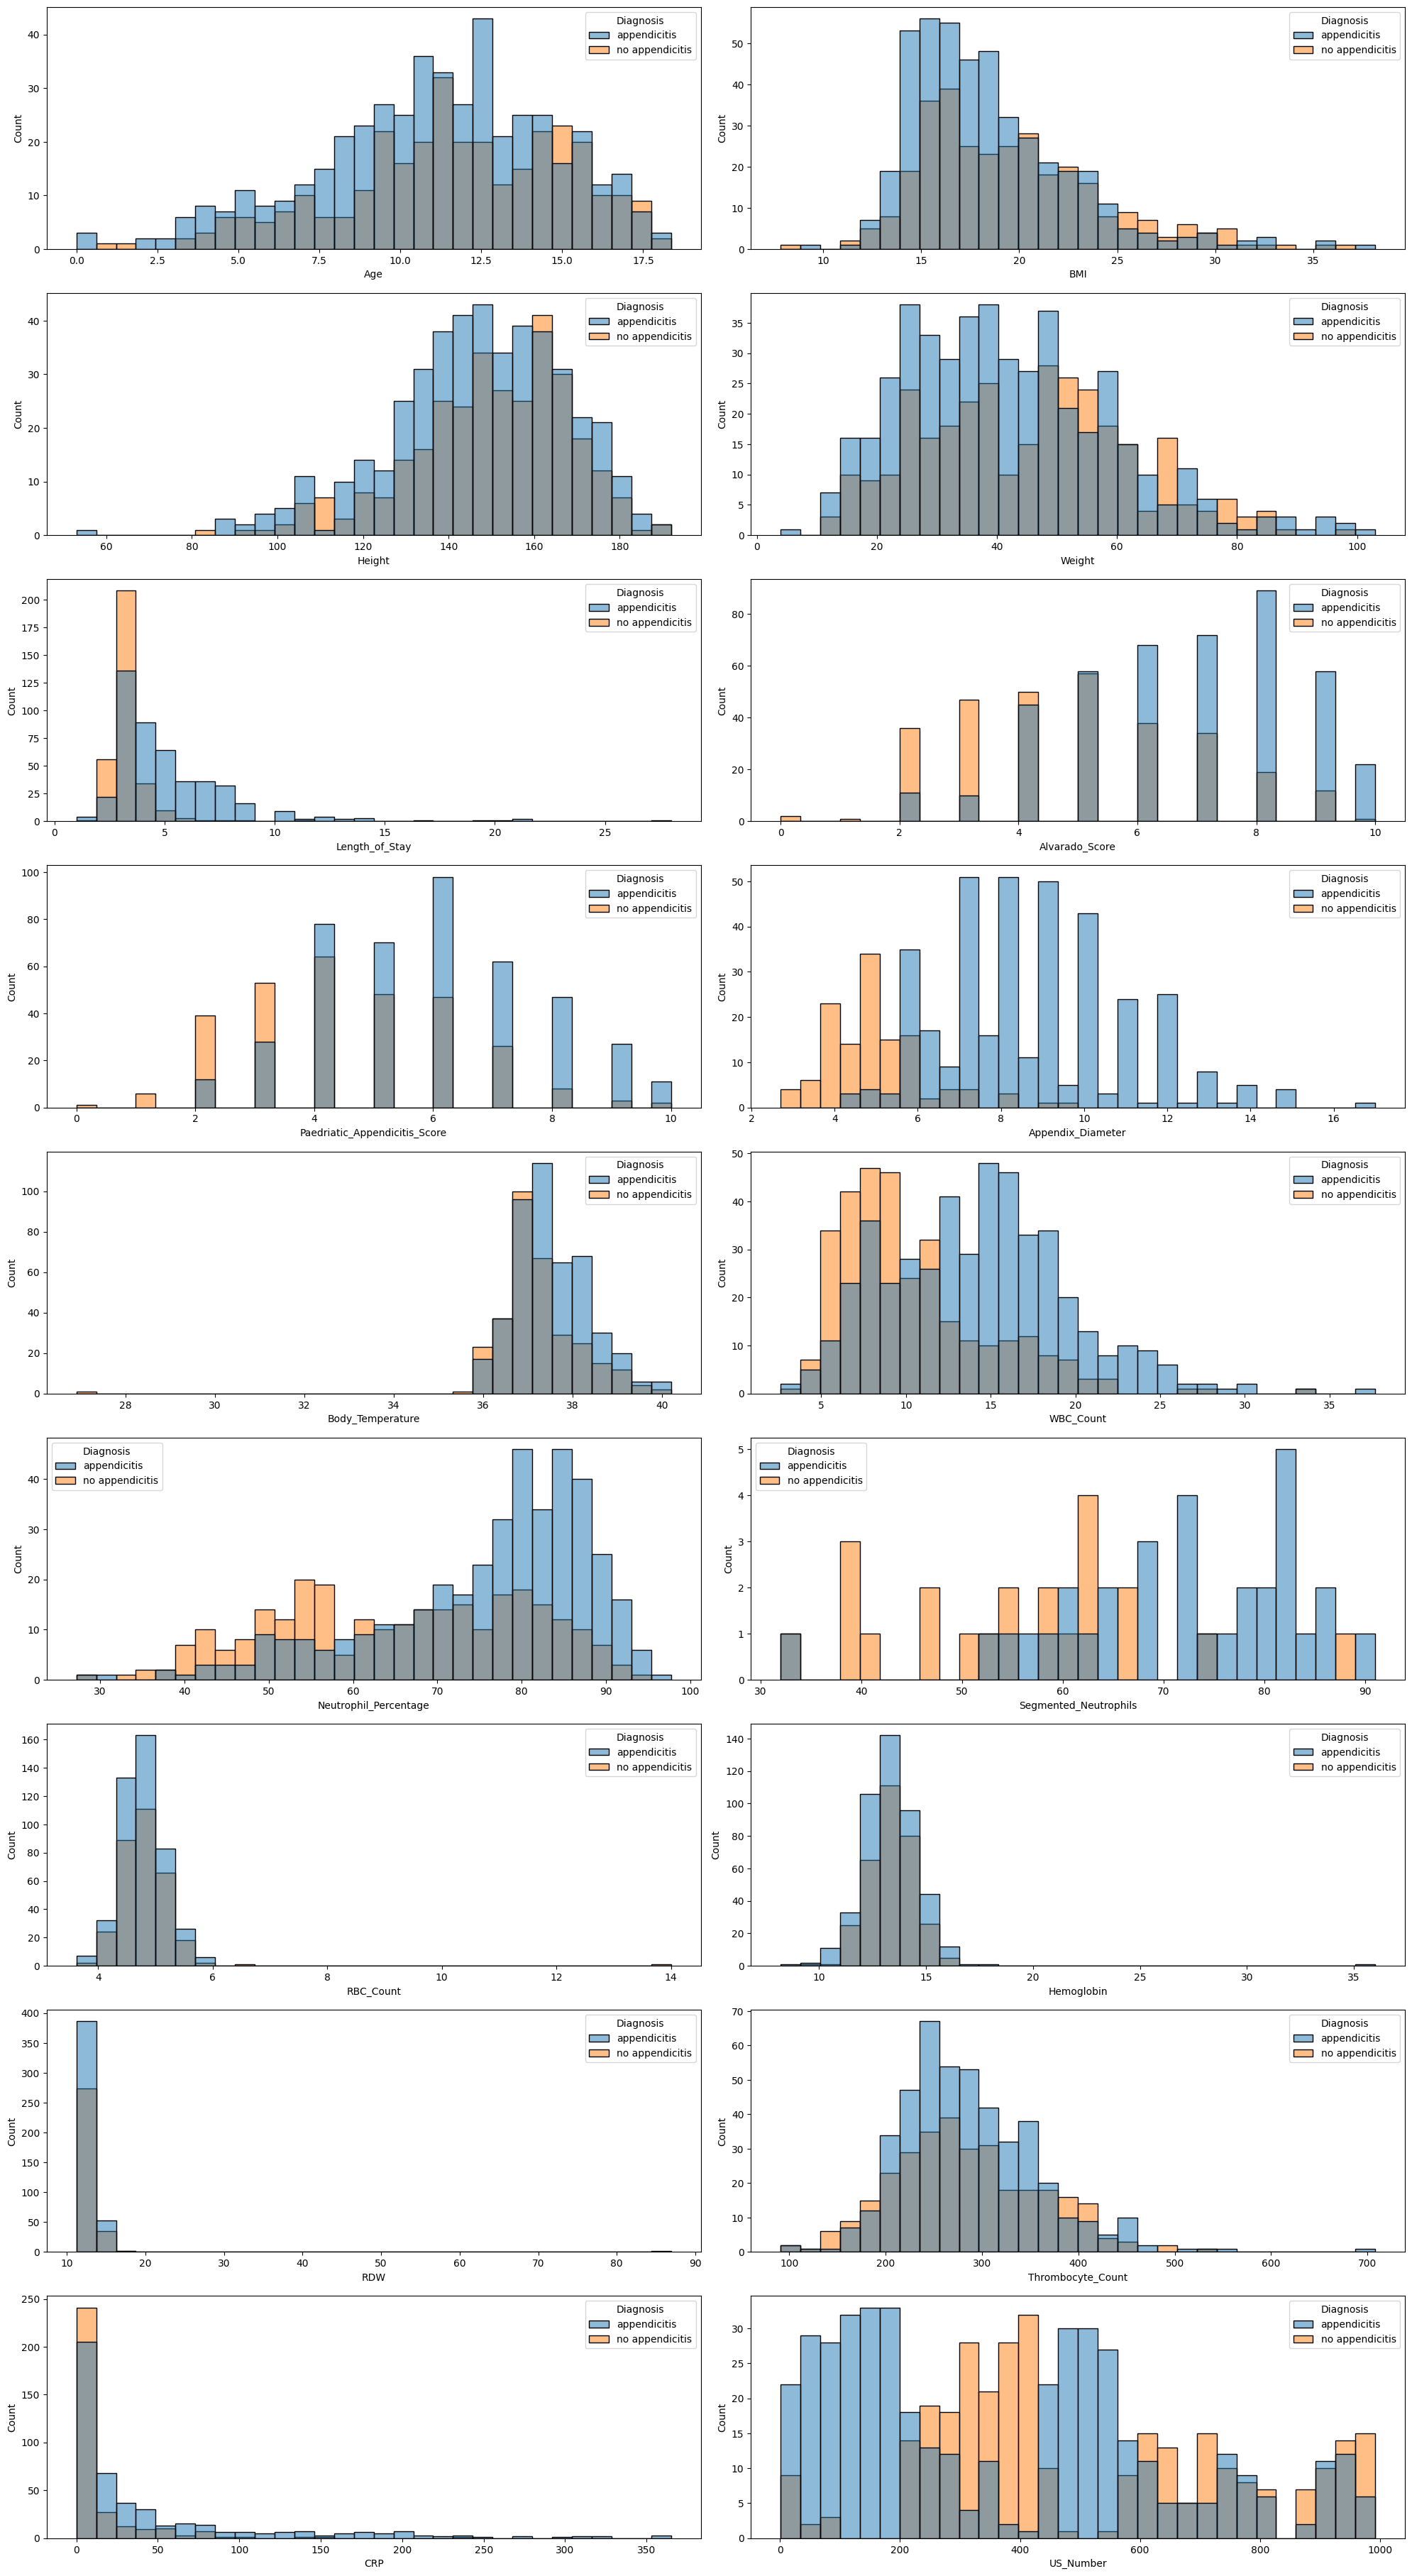

In [83]:
# гистограмы по отношению к целевой переменной
plt.figure(figsize=(20, 40), dpi=100)

for i, column in enumerate(df[columns_num], start=1):
    plt.subplot(10, 2, i)
    sns.histplot(data=df, x=column, hue=column_target, bins=30)
    plt.tight_layout()

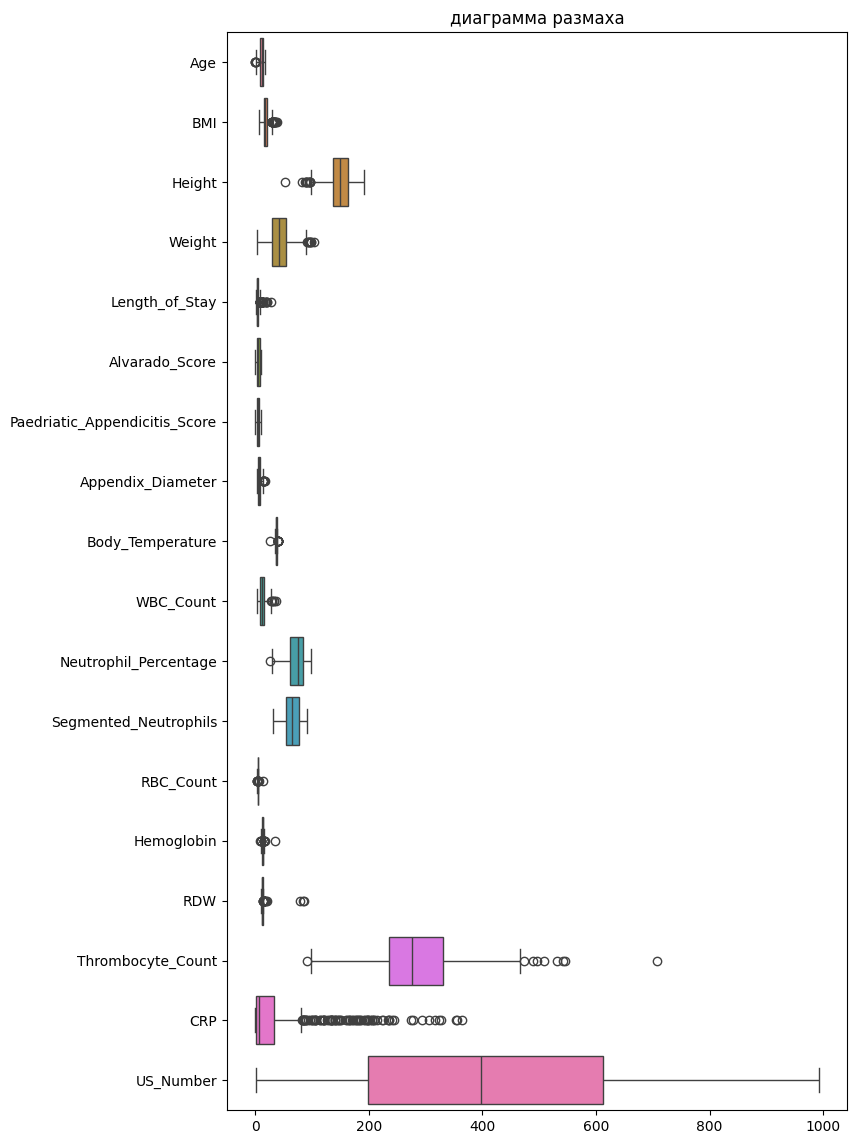

In [84]:
plt.figure(figsize=(8, 14), dpi=100)
plt.title("диаграмма размаха")
sns.boxplot(data=df[columns_num], orient='h');

> значения CRP - имеют лог-нормальное распределение (не может быть меньше 0), поэтому считать полученные данные истинными выбросами будет некорректно;

In [85]:
# функция для одновременного отображения гистограммы и бохплота
def hist_boxplot_plot(df, column):
  fig, ax = plt.subplots(
    2,
    figsize=(14, 6),
    sharex=True, # Common x-axis
    gridspec_kw={"height_ratios": (.7, .3)} # boxplot 30% of the vertical space
    )  

  # Histogram
  df.hist(column=column, grid=False, bins=30, figsize=(14,6), ax=ax[0])
  # Boxplot
  df.boxplot(column=column, grid=False, vert=False, figsize=(14,5), ax=ax[1])
  ax[1].title.set_size(0)
  plt.subplots_adjust(hspace=0.05) # #Adjust gap between the two plots


In [86]:
# пустой список для записи фильтров
filter_data_masks = []

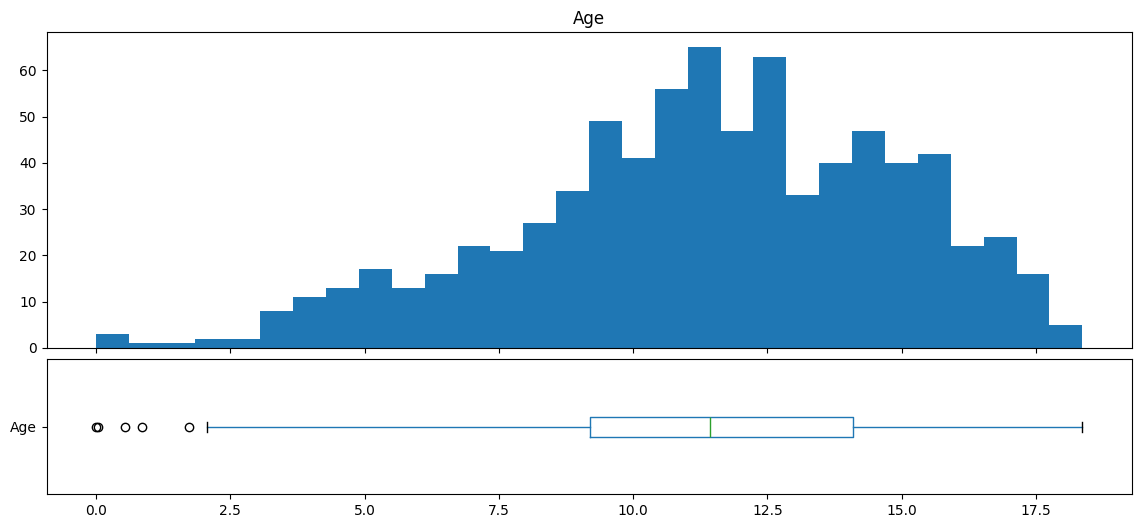

In [87]:
hist_boxplot_plot(df, 'Age')

# значения меньше 2 явно являются выбросами (добавляем соответствующий фильтр в список)
filter_data_masks.append(df['Age'] < 2)

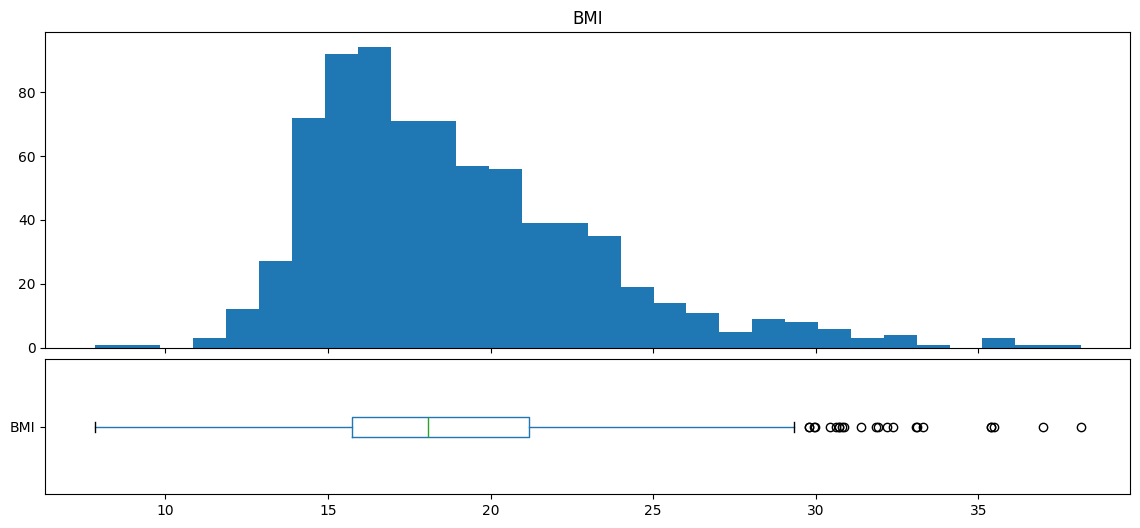

In [88]:
hist_boxplot_plot(df, 'BMI')

filter_data_masks.append(df['BMI'] < 10)

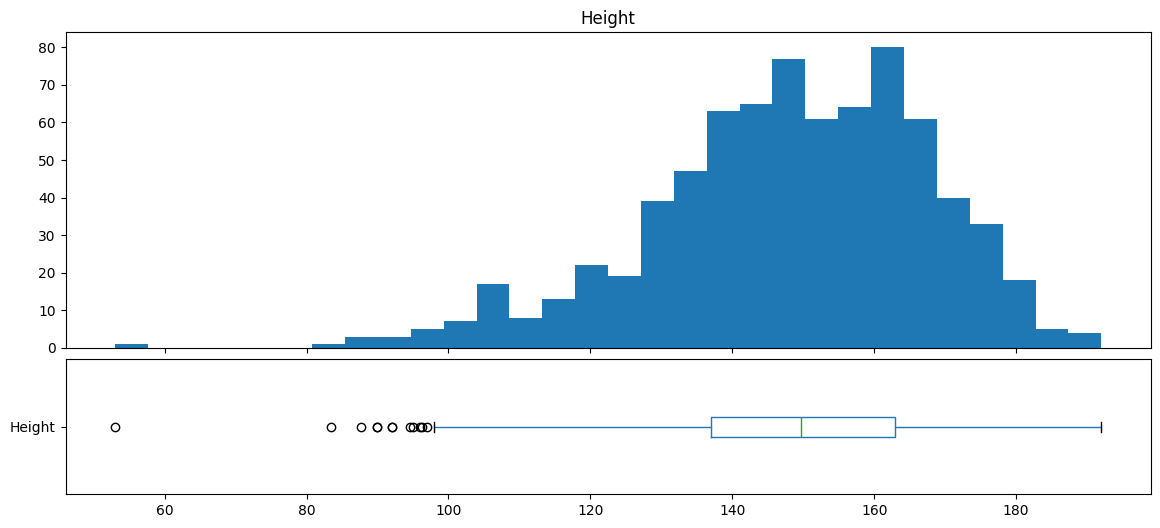

In [89]:
hist_boxplot_plot(df, 'Height')
filter_data_masks.append(df['Height'] < 80)

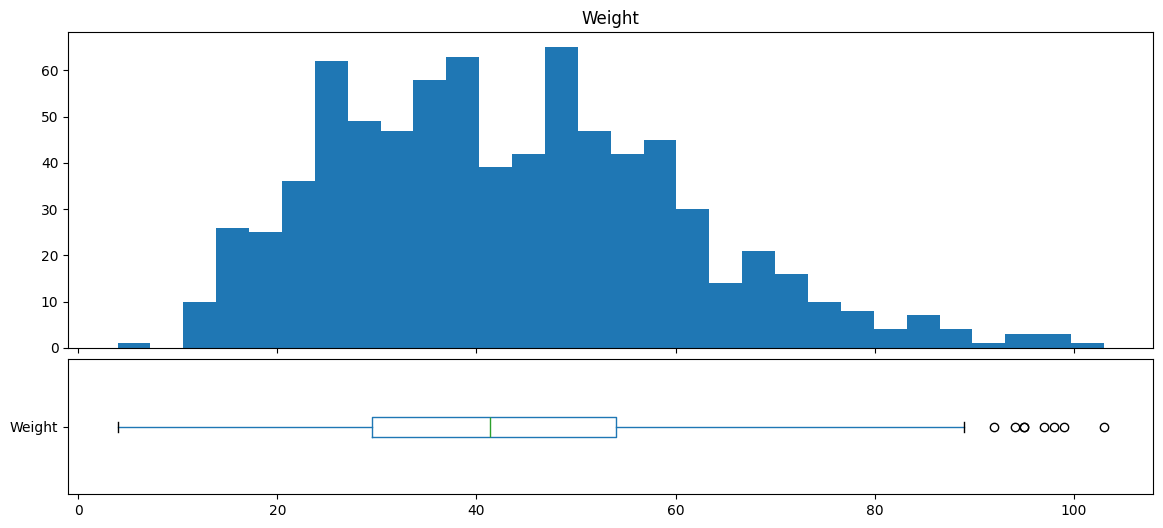

In [90]:
hist_boxplot_plot(df, 'Weight')

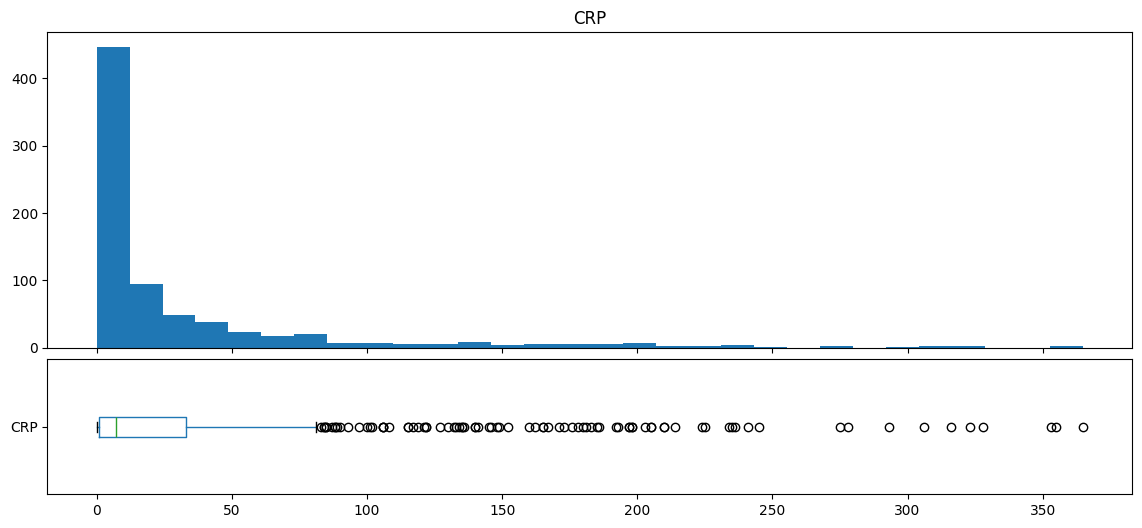

In [91]:
hist_boxplot_plot(df, 'CRP')

# значения СРБ могут принимать такие экстримальные значения

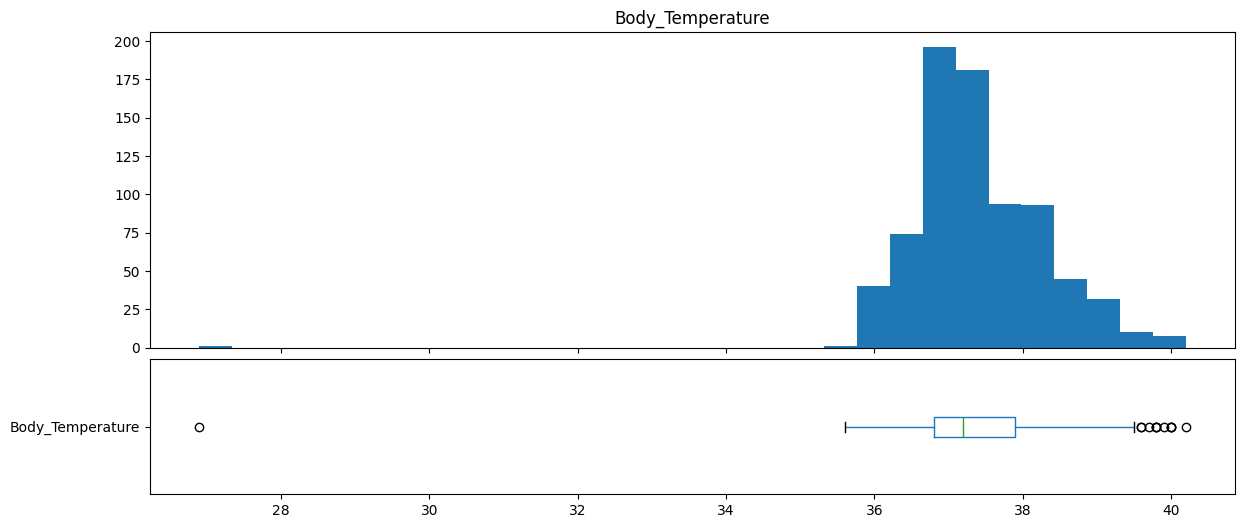

In [92]:
hist_boxplot_plot(df, 'Body_Temperature')

# температура тела менее 34 градусов - явно выброс
filter_data_masks.append(df['Body_Temperature'] < 34)

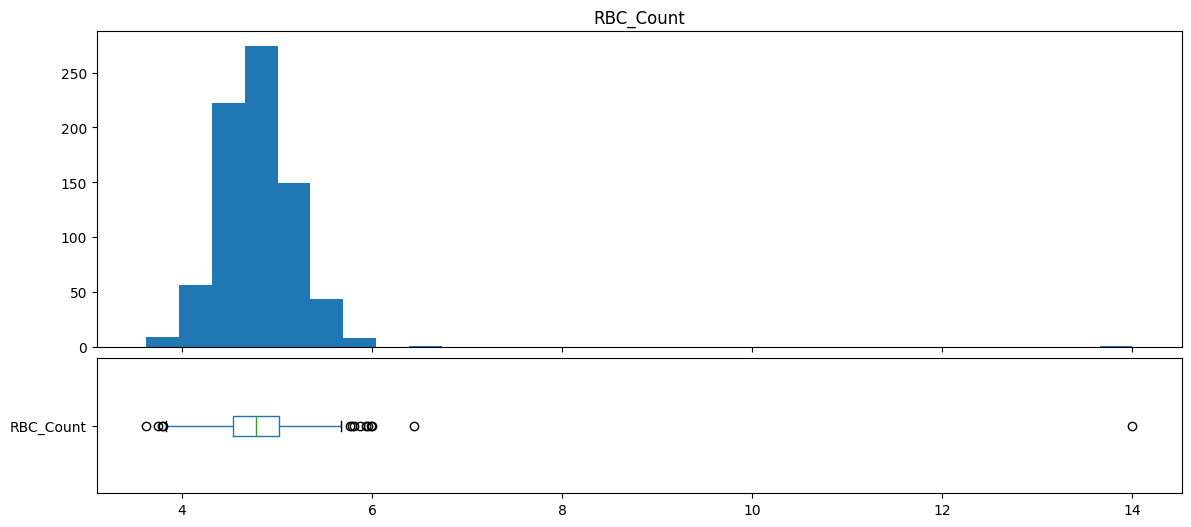

In [93]:
hist_boxplot_plot(df, 'RBC_Count')

# повышение уровня эритроцитов более 10 * 10^9 - достаточно маловероятное событие
filter_data_masks.append(df['RBC_Count'] > 10)

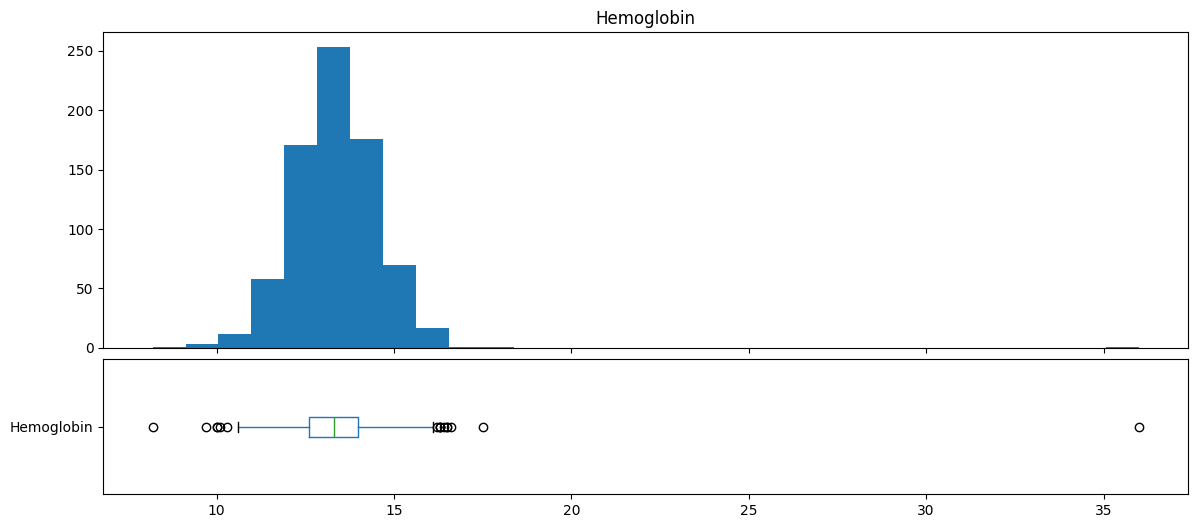

In [94]:
hist_boxplot_plot(df, 'Hemoglobin')

# снижение уровня гемоглобина менее 5 и более 25 - тоже стоит трактовать как выбросы
filter_data_masks.append(df['Hemoglobin'] > 25)
filter_data_masks.append(df['Hemoglobin'] < 5)

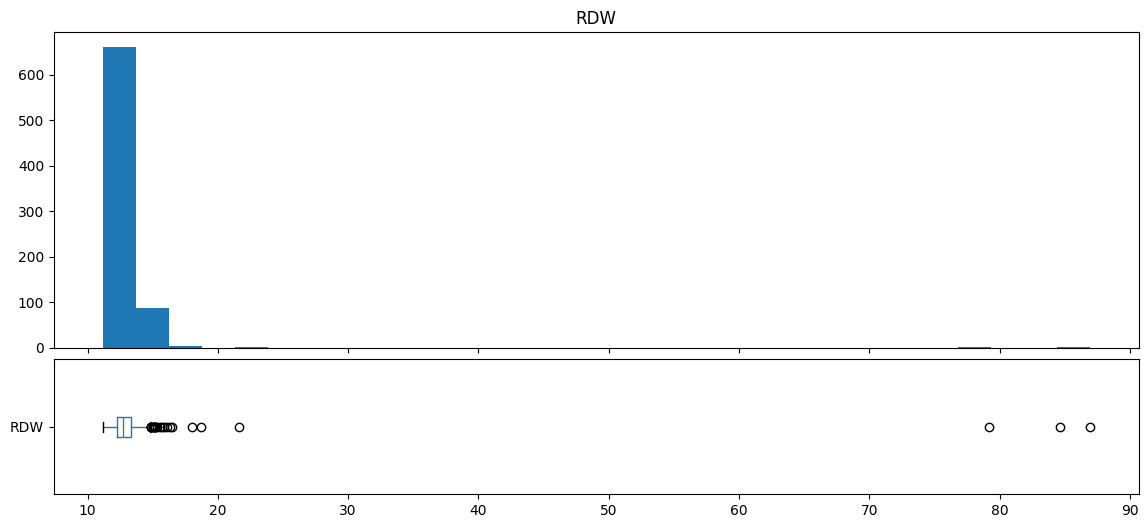

In [95]:
hist_boxplot_plot(df, 'RDW')
filter_data_masks.append(df['RDW'] > 70)

In [96]:
# Check all unique values in categorical columns
for i in columns_obj:
    if i in df.columns:
        print('All values in column {0} : \n{1}'.format(i, df[i].value_counts().sort_index()))
        print('\n')
    else:
        print(f'Column {i} not found in the DataFrame.')

# Print the list of categorical columns
print('Categorical columns:', columns_obj)

All values in column Sex : 
Sex
female    377
male      403
Name: count, dtype: int64


All values in column Management : 
Management
conservative                 483
primary surgical             270
secondary surgical            27
simultaneous appendectomy      1
Name: count, dtype: int64


All values in column Severity : 
Severity
complicated      119
uncomplicated    662
Name: count, dtype: int64


All values in column Diagnosis_Presumptive : 
Diagnosis_Presumptive
Adhäsionen des Colon ascendens                                                    1
Appendizitis, Lymphadenitis mesenterialis                                         1
Appendizitis/ Lymphadenitis mesenterialis                                         1
Bridenileus                                                                       1
Gastroenteritis                                                                   3
Ovarialtorsion                                                                    1
Sepsis mit Begleitappe

> некоторые категориальные переменные содержат одинаковые значения, однако с разным написанием, при сохранении этих переменных в дальнейшем стоит перевести их к одинаковым значениям

## Анализ корреляции между признаками.

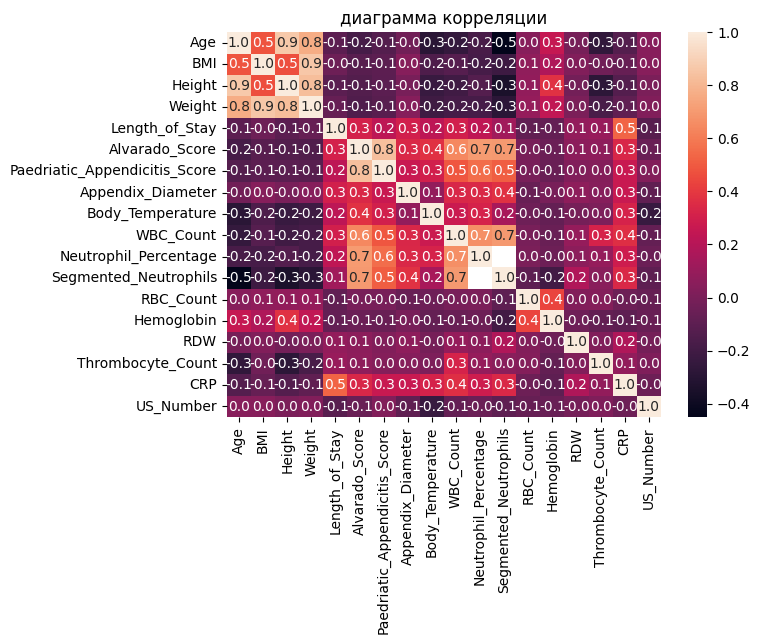

In [97]:
# построение диаграммы корреляции для числовых переменных
plt.figure(figsize=(7, 5), dpi=100)
plt.title("диаграмма корреляции")
sns.heatmap(df[columns_num].corr(), annot=True, fmt = '0.1f');

> среди некоторых количественных переменных имеется мультиколлинеарность (например вес, рост и ИМТ; процент нейтрофилов и сегментоядерных нейтрофилов)

> есть переменные с большим кол-вом пропущенных данных
>
> есть переменные с мультиколлинеарностью
>
> целевая переменная - `Diagnosis`


# 2. Предобработка данных

## Очистите данные: обработайте пропуски, выбросы и категориальные переменные

In [98]:
df.shape

(782, 58)

In [99]:
# создание дополнительного фильтра для очистки датафрейма
additional_masks = [
  # убрать строки, где не содержатся данные о целевой переменной
  df['Diagnosis'].isna(),
  # убрать строки, где УЗИ либо не выполнялось либо не содержит данных
  df['US_Performed'] == 'no',
  df['US_Performed'].isna(),
  df['Appendix_on_US'].isna(),
  # удалить строки с неинформативными значениями
  df['Stool'] == 'constipation, diarrhea'
]

# оставить записи, которые не проходят заданные фильтры
df_clean = df[~np.logical_or.reduce(filter_data_masks + additional_masks)]
df_clean.shape

(748, 58)

### обработка пропусков

In [100]:
# удаляем столбы с более чем 20% пропущенных значений
df_clean = df_clean.dropna(thresh=(df_clean.shape[0]*0.80), axis=1)
df_clean.shape

(748, 36)

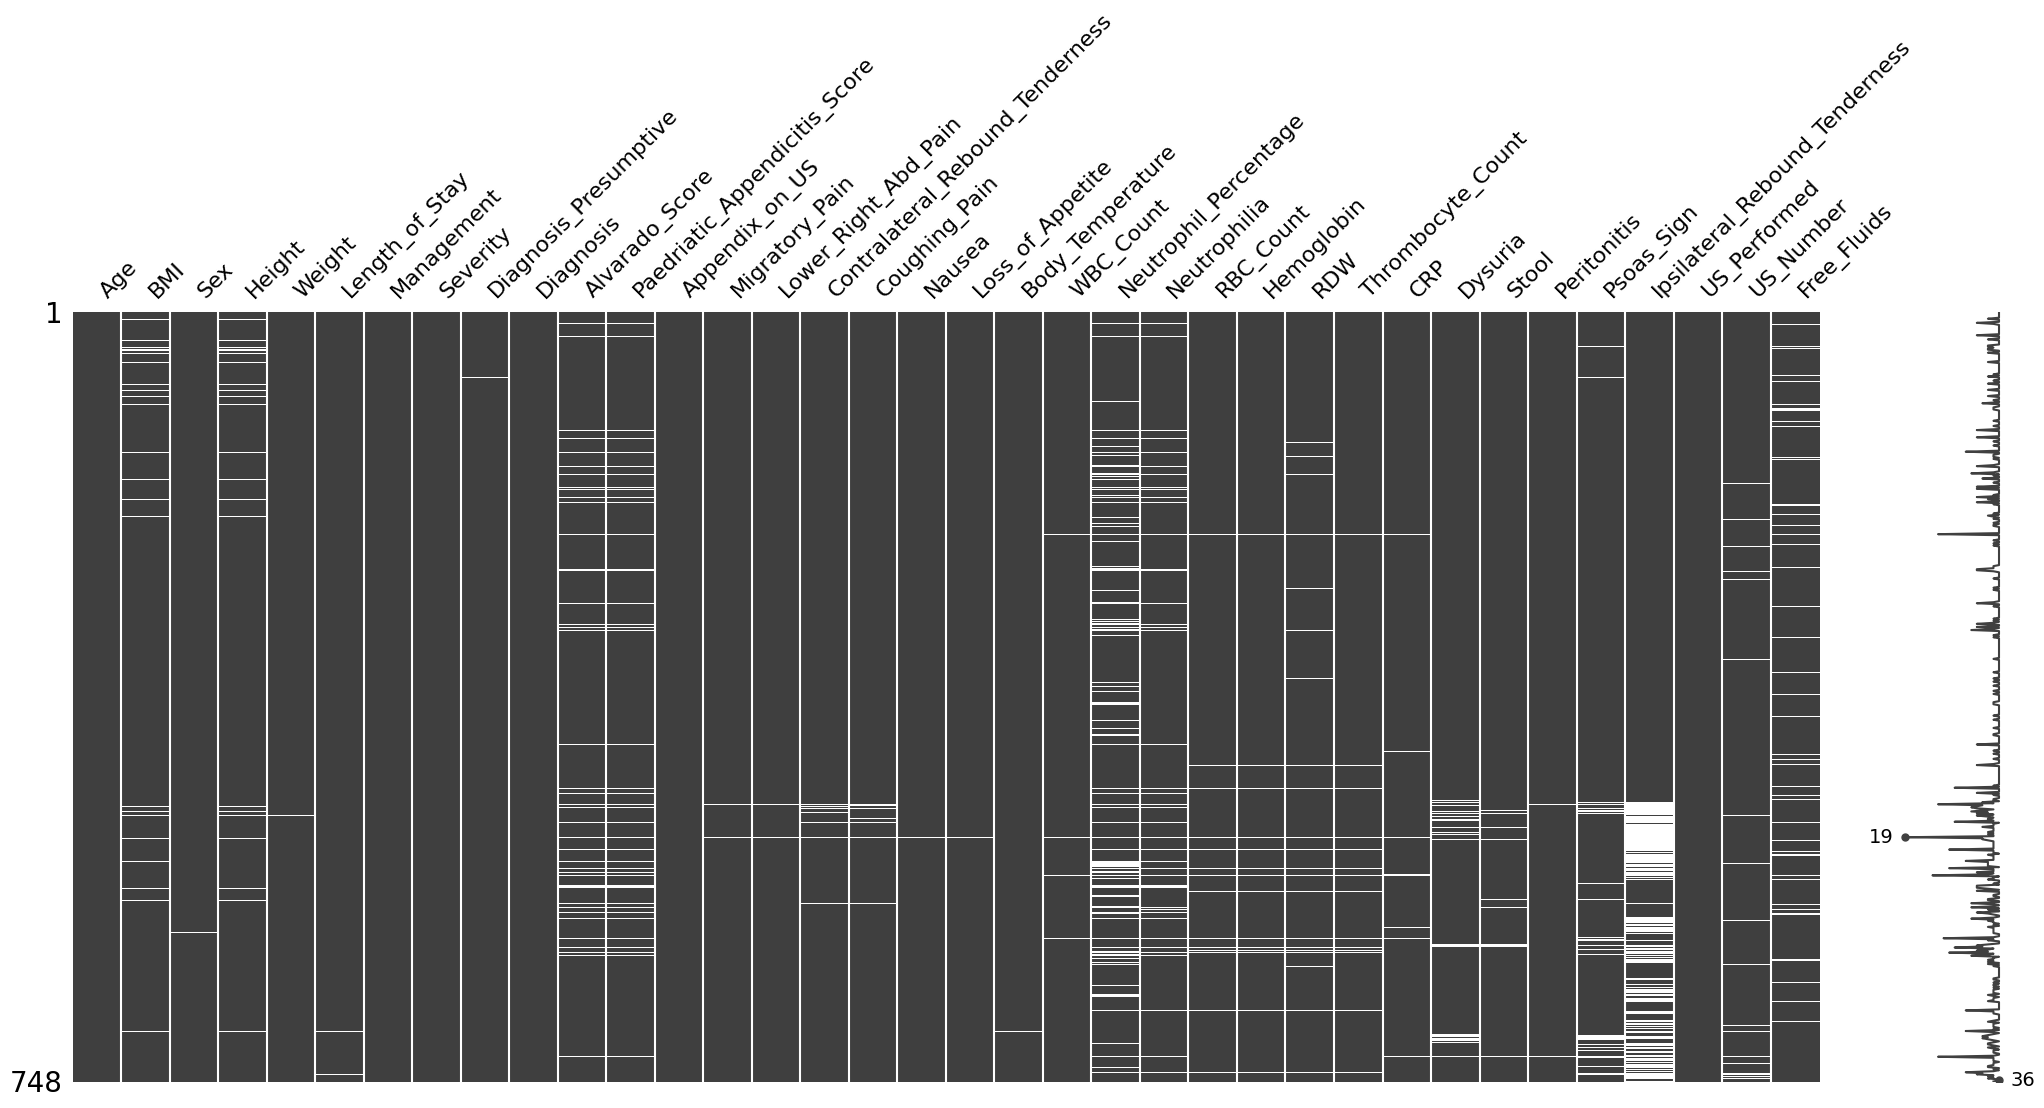

In [101]:
missingno.matrix(df_clean);

In [102]:
# Удаление фич
cols_to_drop = [
  # оценочные индексы (уже включают в себя многие показатели, по умолчанию могут приводить к возникновлению мультиколленеарности)
  'Alvarado_Score',
  'Paedriatic_Appendicitis_Score',
  # предварительным диагнозом
  'Diagnosis_Presumptive',
  # данные касаемые тактики терапии и тяжести аппендицита
  'Management',
  'Severity',
  # данные касаемые факта выполнения/невыполнения УЗИ, и его номера
  'US_Performed',
  'US_Number',
  # 'Appendix_on_US',
  # данные о длительности пребывания не дает дополнительной информации
  'Length_of_Stay'
]

# исключаем из датасета оценочные индексы (уже включают в себя многие показатели, по умолчанию могут приводить к возникновлению мультиколленеарности)
df_clean = df_clean.drop(columns=cols_to_drop, axis=1)
df_clean.shape

(748, 28)

In [103]:
# update columns indices
columns_num = df_clean.select_dtypes(include=['number']).columns
columns_obj = df_clean.select_dtypes(include=['object']).columns

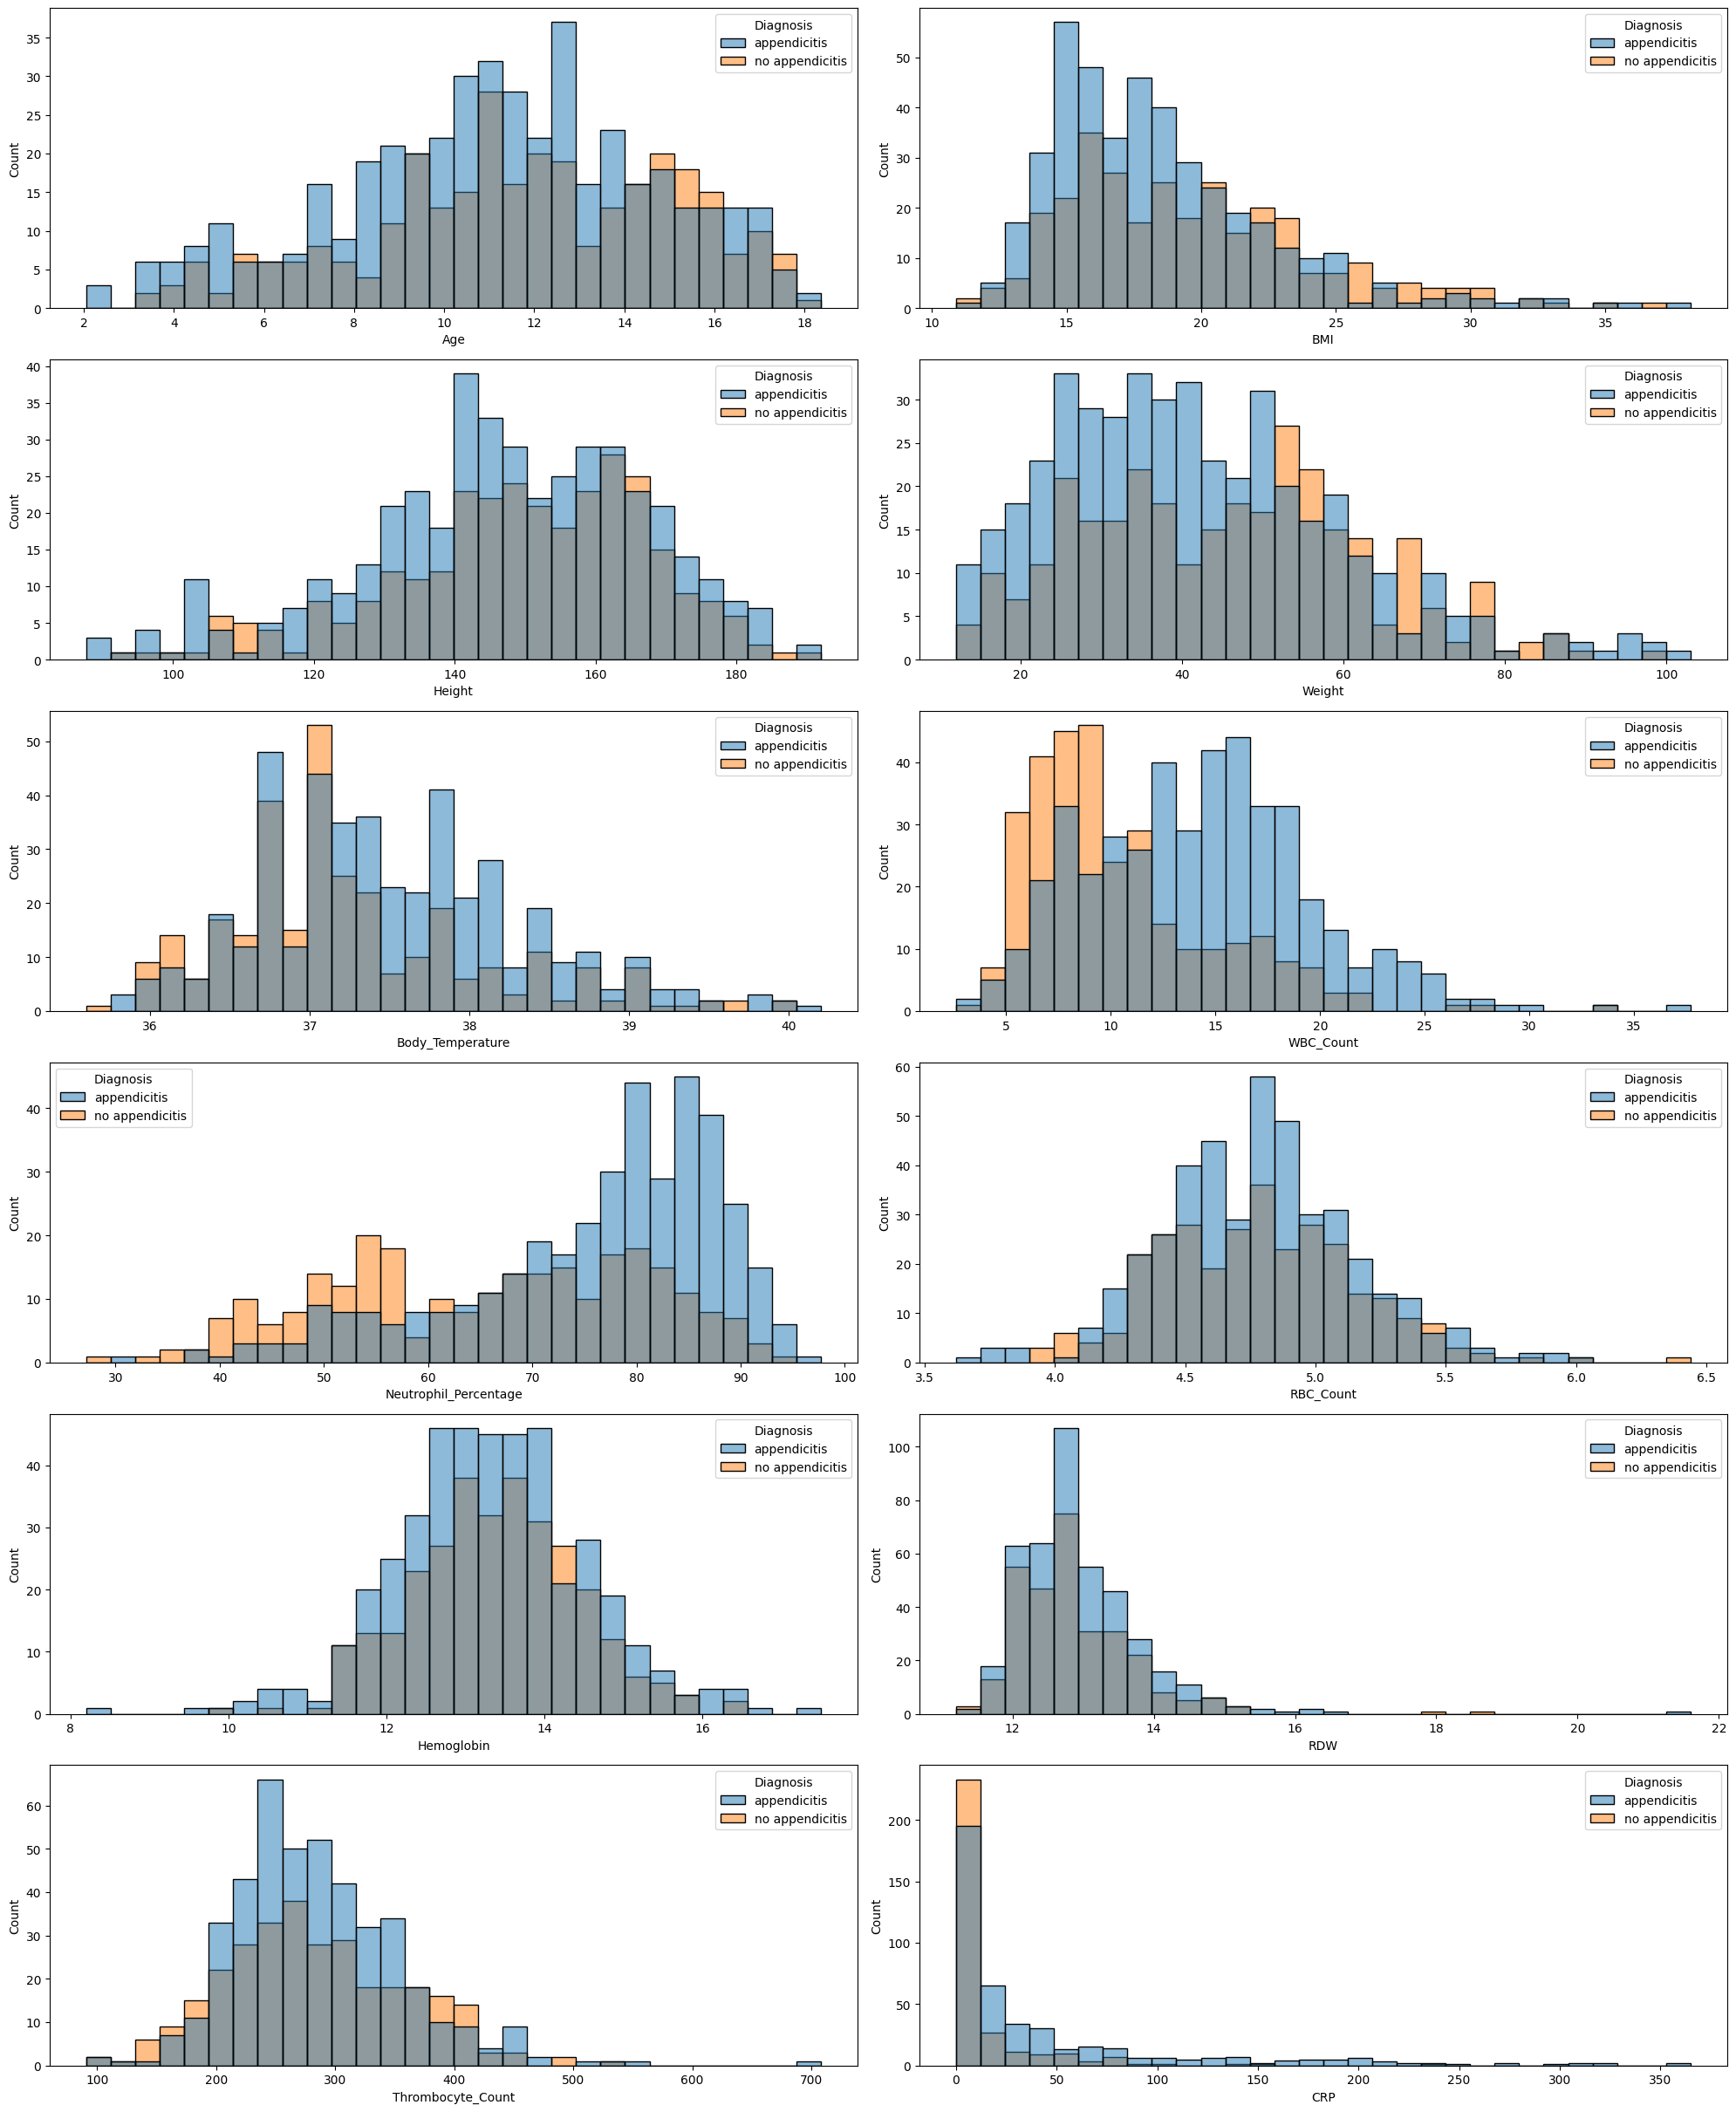

In [104]:
# гистограмы по отношению к целевой переменной
plt.figure(figsize=(20, 40), dpi=100)

for i, column in enumerate(df_clean[columns_num], start=1):
    plt.subplot(10, 2, i)
    sns.histplot(data=df_clean, x=column, hue=column_target, bins=30)
    plt.tight_layout()

> получилось избавиться от экстримальных значений (явных выбросов)

In [105]:
# Check all unique values in categorical columns
for i in columns_obj:
    if i in df_clean.columns:
        print('All values in column {0} : \n{1}'.format(i, df_clean[i].value_counts().sort_index()))
        print('\n')
    else:
        print(f'Column {i} not found in the DataFrame.')

# Print the list of categorical columns
print('Categorical columns:', columns_obj)

All values in column Sex : 
Sex
female    361
male      386
Name: count, dtype: int64


All values in column Diagnosis : 
Diagnosis
appendicitis       441
no appendicitis    307
Name: count, dtype: int64


All values in column Appendix_on_US : 
Appendix_on_US
no     259
yes    489
Name: count, dtype: int64


All values in column Migratory_Pain : 
Migratory_Pain
no     538
yes    208
Name: count, dtype: int64


All values in column Lower_Right_Abd_Pain : 
Lower_Right_Abd_Pain
no      39
yes    707
Name: count, dtype: int64


All values in column Contralateral_Rebound_Tenderness : 
Contralateral_Rebound_Tenderness
no     451
yes    290
Name: count, dtype: int64


All values in column Coughing_Pain : 
Coughing_Pain
no     524
yes    217
Name: count, dtype: int64


All values in column Nausea : 
Nausea
no     307
yes    440
Name: count, dtype: int64


All values in column Loss_of_Appetite : 
Loss_of_Appetite
no     367
yes    380
Name: count, dtype: int64


All values in column Neutrophili

> оставшиеся категориальные переменные состоят преимущественно из бинарных вариантов

In [106]:
# display missing values
display(df_clean.isnull().sum().sort_values(ascending=False))

Ipsilateral_Rebound_Tenderness      146
Neutrophil_Percentage                95
Free_Fluids                          44
Neutrophilia                         43
Psoas_Sign                           29
BMI                                  23
Height                               22
Dysuria                              22
RDW                                  21
Thrombocyte_Count                    14
Hemoglobin                           14
RBC_Count                            14
Stool                                10
CRP                                   8
Contralateral_Rebound_Tenderness      7
Coughing_Pain                         7
WBC_Count                             4
Lower_Right_Abd_Pain                  2
Migratory_Pain                        2
Peritonitis                           2
Body_Temperature                      1
Loss_of_Appetite                      1
Nausea                                1
Weight                                1
Sex                                   1


> В данном ноутбуке фича `Appendix_Diameter` была отфильтрована т.к. содержала в себе более 20% пропущенных значений


In [107]:
# df2=(pd.crosstab(
#   df_clean['Appendix_Diameter'].isna().map({True: 'NA', False: 'VALID'}), 
#   df_clean['Appendix_on_US']
#   ))
# df2

In [108]:
# df_clean = df_clean[df_clean['Appendix_on_US'] == 'yes']

In [109]:
# заменить числовые переменными - средними значениями
df_clean[columns_num] = df_clean[columns_num].fillna(df_clean[columns_num].mean())

# категориальные - модой
for col in columns_obj:
  df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# display missing values
display(df_clean.isnull().sum())


Age                                 0
BMI                                 0
Sex                                 0
Height                              0
Weight                              0
Diagnosis                           0
Appendix_on_US                      0
Migratory_Pain                      0
Lower_Right_Abd_Pain                0
Contralateral_Rebound_Tenderness    0
Coughing_Pain                       0
Nausea                              0
Loss_of_Appetite                    0
Body_Temperature                    0
WBC_Count                           0
Neutrophil_Percentage               0
Neutrophilia                        0
RBC_Count                           0
Hemoglobin                          0
RDW                                 0
Thrombocyte_Count                   0
CRP                                 0
Dysuria                             0
Stool                               0
Peritonitis                         0
Psoas_Sign                          0
Ipsilateral_

### работа с категориальными переменными

In [110]:
# transform categorical features
df_clean['Sex'] = (df_clean['Sex'] == 'male')*1
df_clean['Diagnosis'] = (df_clean['Diagnosis'] == 'appendicitis')*1

# transform columns with yes/no values to 0/1
yes_no_cols = ['Appendix_on_US', 'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Neutrophilia', 'Dysuria', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness', 'Free_Fluids']

df_clean[yes_no_cols] = df_clean[yes_no_cols].apply(lambda x: (x == "yes")*1)

In [111]:
# # transform features with no/+/++/+++ variants
# def ff (par):
#   if par == "no":
#     return 0
#   elif par == "+":
#     return 1
#   elif par == "++":
#     return 2
#   elif par == "+++":
#     return 3

# df_clean['Ketones_in_Urine'] = df_clean['Ketones_in_Urine'].apply(ff)
# df_clean['RBC_in_Urine'] = df_clean['RBC_in_Urine'].apply(ff)
# df_clean['WBC_in_Urine'] = df_clean['WBC_in_Urine'].apply(ff)

In [112]:
# 
columns_obj = df_clean.select_dtypes(include=['object']).columns

# перевод категориальных переменных в дамми-переменные
df_mod = pd.get_dummies(
    df_clean,
    columns=columns_obj,
    dtype='int',
    drop_first=True
)

# df_mod = df_clean.copy()

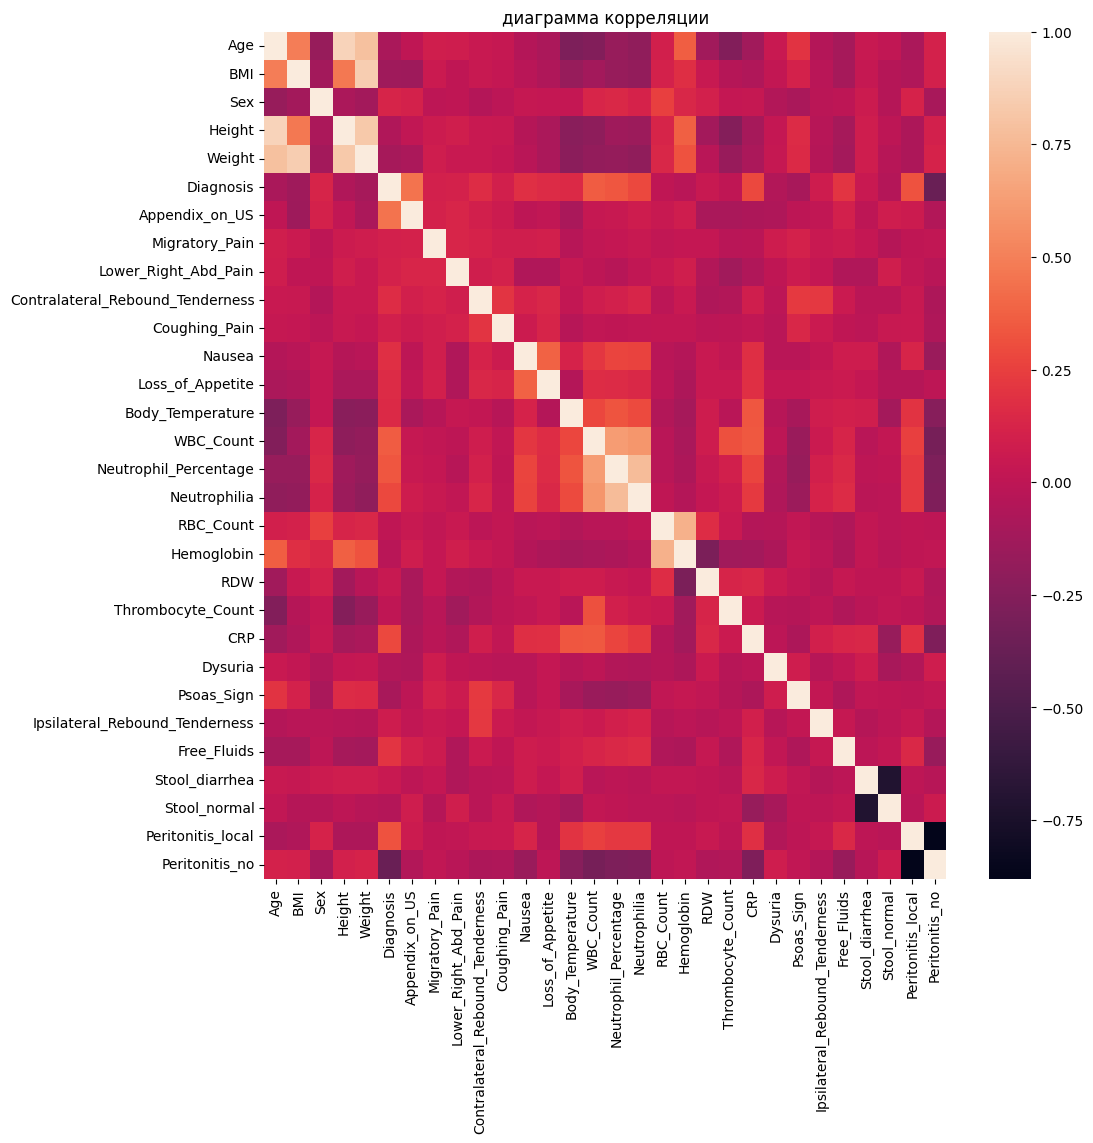

In [113]:
# построение диаграммы корреляции для числовых переменных
plt.figure(figsize=(11, 11))
plt.title("диаграмма корреляции")
sns.heatmap(df_mod.corr(), annot=False, fmt = '0.1f');

> параметры `Neutrophilia`, `WBC_count` и `Neutrophil_Percentage` обладают мультиколлинеарностью (нейтрофилы - подгруппа лейкоцитов 'WBC', Neutrophilia отражает повышение уровня нейтрофилов больше 75%) 

In [114]:
df_mod = df_mod.drop(columns='WBC_Count', axis=1)
df_mod = df_mod.drop(columns='Neutrophil_Percentage', axis=1)

> тоже самое касается `RBC_Count`, `Hemoglobin` 

In [115]:
df_mod = df_mod.drop(columns='RBC_Count', axis=1)

> тоже самое касается `BMI`, `Height` и `Weight`

In [116]:
df_mod = df_mod.drop(columns=['Height', 'Weight'], axis=1)

In [117]:
df_mod = df_mod.drop('Appendix_on_US', axis=1)


## Нормализуйте и/или стандартизируйте данные, если это необходимо.

In [118]:
# обновление список количественных и категориальных переменных
columns_num = df_mod.select_dtypes(include=['number']).columns
columns_obj = df_mod.select_dtypes(include=['object']).columns

In [119]:
# подготовка данных

# определение целевой переменной
target = 'Diagnosis'

# разбивка датасета    
X = df_mod.drop(target, axis=1)
y = df_mod[target]

# разделение данных на тренировочный и тестовый сет
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 42, stratify=y)



In [120]:
# поиск малоинформативных фич
def find_low_informative_features(train):
    dummy_props = train.loc[:, ~train.columns.isin(columns_num)].mean(axis=0)
    low_informative = dummy_props.index[(dummy_props.values <= 0.1) | (dummy_props.values >= 0.9)]

    return low_informative

low_informative = find_low_informative_features(X_train)
low_informative

Index([], dtype='object')

In [121]:
# удаление малоинформативных фич
X_train, X_test = X_train.drop(columns=low_informative), X_test.drop(columns=low_informative)

In [122]:
# стандартизирование фич
def standardize(train, test, columns=None):
    sc = StandardScaler()

    if columns is None:
        columns = train.columns

        # scale what need to be scaled
        train_scaled = pd.DataFrame(sc.fit_transform(train[columns]), columns=columns)
        test_scaled = pd.DataFrame(sc.transform(test[columns]), columns=columns)

        # merge with remaining part
        train = pd.concat([train_scaled, train.drop(columns=columns)], axis=1)
        test = pd.concat([test_scaled, test.drop(columns=columns)], axis=1)

    return train, test

X_train_scaled, X_test_scaled = standardize(X_train, X_test, columns=columns_num)

In [123]:
# def get_useful_features(X_train, y_train, cutoff=0.05):
#     features = []

#     for column in X_train.columns:
#         if column in columns_num:
#             result = stats.kruskal(
#                 X_train.loc[y_train == 0, column],
#                 X_train.loc[y_train == 1, column]
#             )
#         else:
#             crosstab = pd.crosstab(X_train[column], y_train)
#             result = stats.chi2_contingency(crosstab)

#         if result.pvalue < cutoff:
#             features.append(column)

#     return features

# useful_features = get_useful_features(X_train_scaled, y_train)
# useful_features

# 3. Построение моделей машинного обучения

## Выберите как минимум три различных алгоритма машинного обучения (например, логистическую регрессию, решающие деревья, случайный лес, градиентный бустинг и так далее).

## Обучите модели на тренировочных данных, используя кросс-валидацию для оценки их производительности.

In [124]:
# validator
strat_K_cross_valid = StratifiedKFold(n_splits=5)

In [125]:
# определение функции для обучения модели и получения метрик
def models_test(X_train, X_test, y_train, y_test, model):

  # обучаем модель
  model.fit(X_train, y_train)

  # получаем результат
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)[:, 1]

  cv_metrics = cross_validate(
    X=X_train,
    y=y_train,
    estimator=model,
    cv=strat_K_cross_valid,
    scoring='f1',
    return_train_score=True
  )

  # метрики по модели
  conf_matrix = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = conf_matrix.ravel()

  metrics = {
      'Accuracy': accuracy_score(y_test, y_pred),
      "Balanced accuracy": balanced_accuracy_score(y_test, y_pred),
      'Precision': precision_score(y_test, y_pred),
      'Recall': recall_score(y_test, y_pred),
      'F1 Score': f1_score(y_test, y_pred),
      'ROC AUC': roc_auc_score(y_test, y_pred_proba),
      "PR AUC": average_precision_score(y_test, y_pred_proba),
      'Specifity': tn / (tn + fp)
  }
  cv_metrics = {
      'Train k-fold mean f1': np.mean(cv_metrics['train_score']),
      'Test k-fold mean f1': np.mean(cv_metrics['test_score'])
  }

  return metrics, conf_matrix, cv_metrics

In [126]:
# определение используемых функции и параметров
models_dict = {
  'Logistic Regression': LogisticRegression(random_state=42, max_iter=5000),
  'Дерево решений': DecisionTreeClassifier(random_state=42),
  'Random Forest Classifier': RandomForestClassifier(random_state=42, class_weight='balanced'),
  'XGB Classifier': XGBClassifier(random_state=42)
}

In [127]:
# функция для визуального отражения полученных метрик
def model_perf_vis(dict):
    # пустой словарь
    model_performance = {}

    # получение значений
    for model_name, metrics in dict.items():
        model_performance_items = {}
        for name, value in metrics.items():
            model_performance_items[name] = value
        model_performance[model_name] = model_performance_items

    # извлечь метрики и названия модели
    models = list(model_performance.keys())
    metrics = list(model_performance[models[0]].keys())

    # полотно
    fig, ax = plt.subplots(figsize=(10, 6))

    # отразить каждую метрику отдельной линией
    for metric_name in metrics:
        values = [model_performance[model_name][metric_name] for model_name in models]
        ax.plot(models, values, marker='o', label=metric_name)

    # название и легенда
    ax.set_xlabel('Модель')
    ax.set_ylabel('Метрики')
    ax.set_title('Производительность модели')
    ax.legend()

    # повернуть значения на оси x на 45 градусов
    plt.xticks(rotation=45)

    # показать график
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [128]:
# пустые словари для записи в них результатов
metrics_dict = {}
conf_mat_dict = {}
cv_metrics = {}

# создание моделей
for name in models_dict:
  metrics_dict[name], conf_mat_dict[name], cv_metrics[name] = models_test(X_train_scaled, X_test_scaled, y_train, y_test, models_dict[name])
  # metrics_dict[name], conf_mat_dict[name], cv_metrics[name] = models_test(X_train, X_test, y_train, y_test, models_dict[name])

# 4. Оценка моделей

## Оцените качество построенных моделей с помощью метрик, которые были рассмотрены на занятиях (точность, полнота, F1-мера и ROC-AUC и так далее).

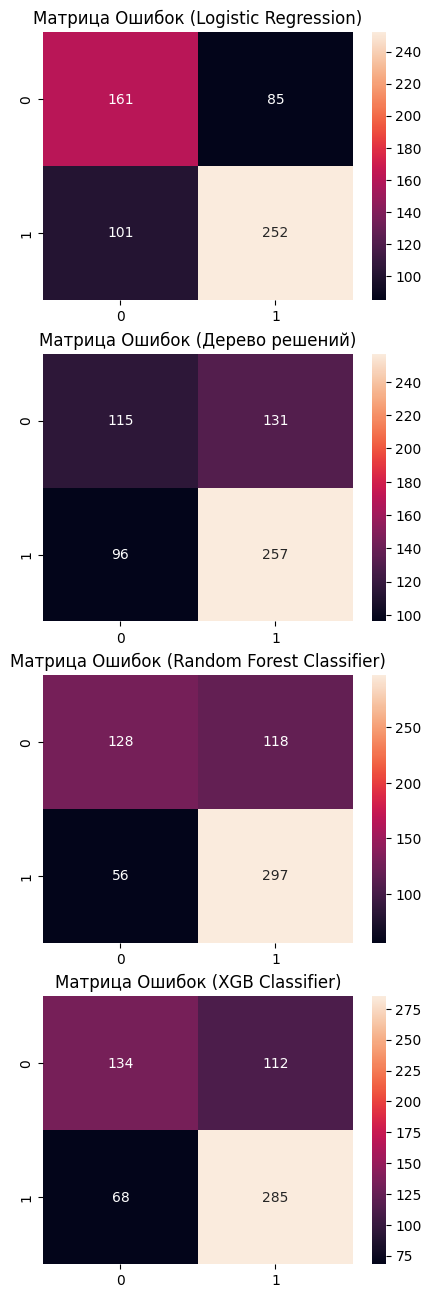

In [129]:
# отрисовка confusion matrixes
n = len(conf_mat_dict)

fig, axes = plt.subplots(n, 1, figsize=(5, n*4))

for index, name in enumerate(conf_mat_dict):
  sns.heatmap(conf_mat_dict[name], annot=True, fmt="d", ax=axes[index])
  axes[index].set_title(f'Матрица Ошибок ({name})')


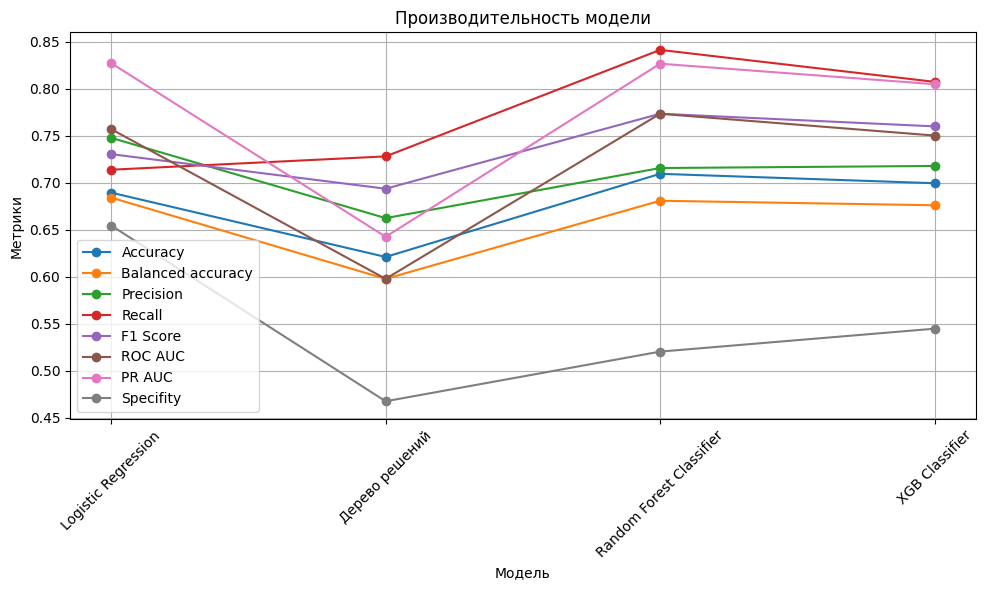

In [130]:
# визуализация метрик
model_perf_vis(metrics_dict)


In [131]:
pd.DataFrame(metrics_dict).T.round(2).sort_values(by='Accuracy', ascending=False)

,Accuracy,Balanced accuracy,Precision,Recall,F1 Score,ROC AUC,PR AUC,Specifity
Random Forest Classifier,0.71,0.68,0.72,0.84,0.77,0.77,0.83,0.52
XGB Classifier,0.70,0.68,0.72,0.81,0.76,0.75,0.80,0.54
Logistic Regression,0.69,0.68,0.75,0.71,0.73,0.76,0.83,0.65
Дерево решений,0.62,0.60,0.66,0.73,0.69,0.60,0.64,0.47


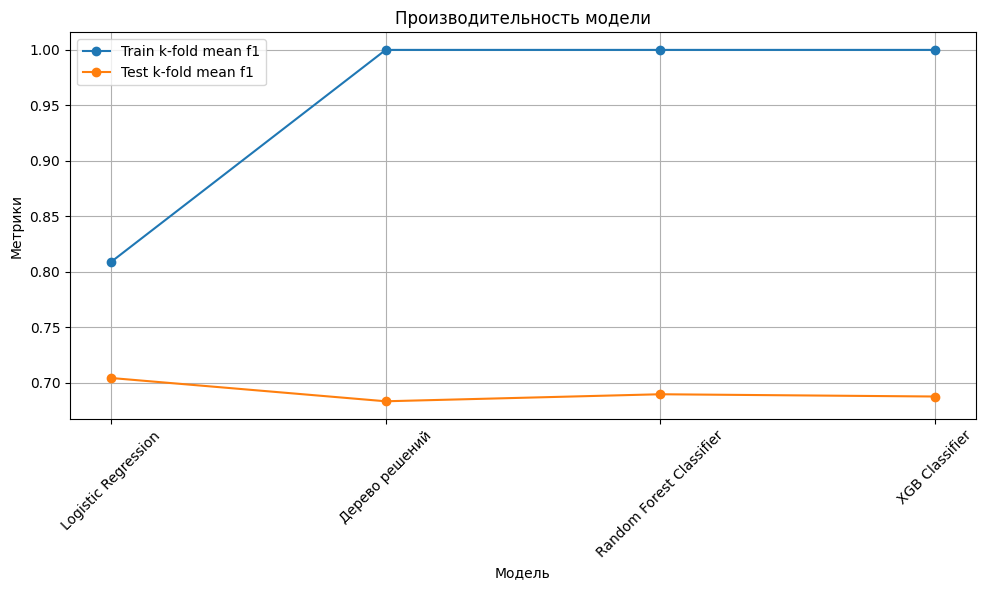

In [132]:
# визуализация метрик
model_perf_vis(cv_metrics)

## Сравните результаты моделей и выберите наилучшую по производительности.

> без подбора гиперпараметров модели показывают достаточно хорошую производительность (Random Forest Classifier - самая точная, Logistic Regression - выше специфичность)

# 5. Подбор гиперпараметров

## Оптимизируйте производительность моделей путем подбора гиперпараметров.

In [133]:
# определение функции для обучения модели и получения метрик (c гиперпараметрами)
def models_test_with_hyperparams(X_train, X_test, y_train, y_test, model_params_list):
  
  # вытаскиваем модель из листа
  model = model_params_list[0]
  # получаем сетку параметров
  param_grid = model_params_list[1]


  # поиск оптимальных параметров для модели
  grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_train)

  # лучшая модель и параметры для нее
  best_model = grid_search.best_estimator_
  best_params = grid_search.best_params_

  # обучаем модель
  best_model.fit(X_train, y_train)

  # получаем результат
  y_pred = best_model.predict(X_test)
  y_pred_proba = best_model.predict_proba(X_test)

  
  cv_metrics = cross_validate(
    X=X_train,
    y=y_train,
    estimator=best_model,
    cv=strat_K_cross_valid,
    scoring='f1',
    return_train_score=True
  )

  # метрики по модели
  conf_matrix = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = conf_matrix.ravel()

  metrics = {
      'Accuracy': accuracy_score(y_test, y_pred),
      "Balanced accuracy": balanced_accuracy_score(y_test, y_pred),
      'Precision': precision_score(y_test, y_pred),
      'Recall': recall_score(y_test, y_pred),
      'F1 Score': f1_score(y_test, y_pred),
      'ROC AUC': roc_auc_score(y_test, y_pred_proba[:, 1]),
      "PR AUC": average_precision_score(y_test, y_pred_proba[:, 1]),
      'Specifity': tn / (tn + fp)
  }

  cv_metrics = {
    'Train k-fold mean f1': np.mean(cv_metrics['train_score']),
    'Test k-fold mean f1': np.mean(cv_metrics['test_score'])
  }

  results = {
    'predict' : y_pred,
    'proba' : y_pred_proba,
  }

  return metrics, conf_matrix, cv_metrics, best_model, best_params, results

In [134]:
models_dict = {
  'Logistic Regression':[
    LogisticRegression(random_state=0), 
    {'penalty':['l1'],
     'solver':['liblinear'],
     'C': [0.1, 1, 10, 100]}
  ],
  'Дерево решений':[
    DecisionTreeClassifier(random_state=0),
    {'max_depth': [5, 10, 15],
     'min_samples_split': [5, 10, 20],
     'min_samples_leaf': [10, 20, 40]}
  ],
  'Random Forest Classifier':[
    RandomForestClassifier(random_state=0, class_weight='balanced'),
    {'n_estimators': [50, 100, 150],
     'max_depth': [None, 10, 20],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]}
  ],
  'XGB Classifier':[
    XGBClassifier(random_state=0),
    {'n_estimators': [50, 100, 150],
     'max_depth': [3, 5, 7],
     'learning_rate': [0.01, 0.1, 0.2],
     'subsample': [0.8, 1.0],
     'colsample_bytree': [0.8, 1.0],
     'gamma': [0, 1, 2]}
  ]
}

In [135]:
metrics_dict = {}
conf_mat_dict = {}
cv_metrics = {}
best_models = {}
resultess = {}

for name in models_dict:
  metrics_dict[name], conf_mat_dict[name], cv_metrics[name],best_models[name],_,resultess[name] = models_test_with_hyperparams(X_train_scaled, X_test_scaled, y_train, y_test, models_dict[name])

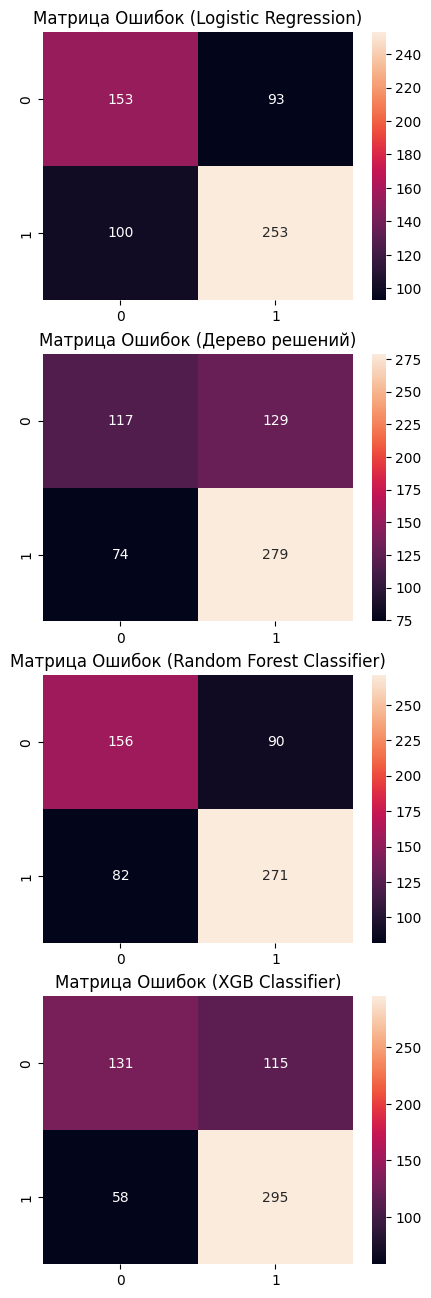

In [136]:
# отрисовка confusion matrixes
n = len(conf_mat_dict)

fig, axes = plt.subplots(n, 1, figsize=(5, n*4))

for index, name in enumerate(conf_mat_dict):
  sns.heatmap(conf_mat_dict[name], annot=True, fmt="d", ax=axes[index])
  axes[index].set_title(f'Матрица Ошибок ({name})')


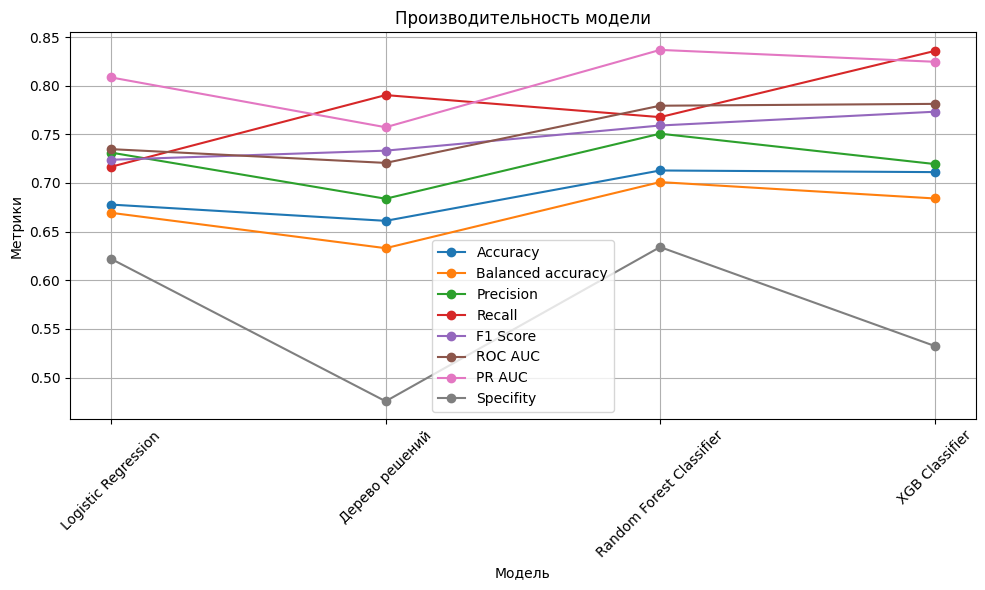

In [137]:
# визуализация метрик
model_perf_vis(metrics_dict)

In [138]:
pd.DataFrame(metrics_dict).T.round(2).sort_values(by='Accuracy', ascending=False)

,Accuracy,Balanced accuracy,Precision,Recall,F1 Score,ROC AUC,PR AUC,Specifity
Random Forest Classifier,0.71,0.70,0.75,0.77,0.76,0.78,0.84,0.63
XGB Classifier,0.71,0.68,0.72,0.84,0.77,0.78,0.82,0.53
Logistic Regression,0.68,0.67,0.73,0.72,0.72,0.73,0.81,0.62
Дерево решений,0.66,0.63,0.68,0.79,0.73,0.72,0.76,0.48


# 6. Оценка важности признаков

## Проанализируйте важность признаков для одной выбранной модели.

In [139]:
pd.DataFrame(
  np.hstack((best_models['Logistic Regression'].coef_)),
  index=df_mod.columns.drop('Diagnosis'),
  columns=['importance']
  ).sort_values(by='importance', ascending = False).round(2)

,importance
Lower_Right_Abd_Pain,1.99
Coughing_Pain,1.57
Free_Fluids,1.16
Neutrophilia,1.12
Ipsilateral_Rebound_Tenderness,0.80
Nausea,0.71
Loss_of_Appetite,0.61
Migratory_Pain,0.49
Hemoglobin,0.18
CRP,0.02


In [140]:
pd.DataFrame(
  np.hstack((best_models['Random Forest Classifier'].feature_importances_)),
  index=df_mod.columns.drop('Diagnosis'),
  columns=['importance']
  ).sort_values(by='importance', ascending = False).round(2)

,importance
CRP,0.15
Hemoglobin,0.09
BMI,0.08
Thrombocyte_Count,0.07
Peritonitis_no,0.07
Age,0.07
Body_Temperature,0.07
Nausea,0.07
Neutrophilia,0.06
Loss_of_Appetite,0.06


In [141]:
pd.DataFrame(
  np.hstack((best_models['Дерево решений'].feature_importances_)),
  index=df_mod.columns.drop('Diagnosis'),
  columns=['importance']
  ).sort_values(by='importance', ascending = False).round(2)

,importance
CRP,0.48
Hemoglobin,0.18
Loss_of_Appetite,0.18
Peritonitis_no,0.10
Stool_diarrhea,0.03
Age,0.02
Thrombocyte_Count,0.01
Nausea,0.00
Migratory_Pain,0.00
Body_Temperature,0.00


In [142]:
pd.DataFrame(
  list(best_models['XGB Classifier'].get_booster().get_fscore().items()),
  # index=df_mod.columns.drop('Diagnosis'),
  columns=['feature','importance']
  ).sort_values('importance', ascending=False)

,feature,importance
0,Age,12.0
10,Thrombocyte_Count,11.0
11,CRP,11.0
8,Hemoglobin,9.0
1,BMI,7.0
9,RDW,5.0
3,Coughing_Pain,4.0
6,Body_Temperature,4.0
7,Neutrophilia,4.0
12,Psoas_Sign,4.0


In [143]:
proba_for_curves = {}

for model_name, metrics in resultess.items():
  proba_for_curves[model_name] = metrics['proba']

In [144]:
def plot_roc_pr_curves(true_labels, algorithms):
    """Отрисовка ROC- и PR-кривых.
    Аргументы функции:
    true_labels: истинные метки классов
    algorithms: словарь формата {название_алгоритма: вероятности_принадлежности_к_каждому_классу}
    """
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    ax[0].set_title("ROC-curve", fontsize=20)
    ax[1].set_title("PR-curve", fontsize=20)

    for alg_name, probabilities in algorithms.items():
        fpr, tpr, _ = roc_curve(true_labels, probabilities[:, 1])
        precisions, recalls, _ = precision_recall_curve(true_labels, probabilities[:, 1])

        ax[0].plot(
            fpr,
            tpr,
            label="{} (ROC AUC = {})".format(
                alg_name,
                round(
                    roc_auc_score(true_labels, probabilities[:, 1]),
                    3
                )
            )
        )
        ax[1].plot(
            recalls,
            precisions,
            label="{} (PR AUC = {})".format(
                alg_name,
                round(
                    average_precision_score(true_labels, probabilities[:, 1]),
                    3
                )
            )
        )

    ax[0].legend(fontsize=14)
    ax[0].set_xlabel("False positive rate", fontsize=16)
    ax[0].set_ylabel("True positive rate", fontsize=16)

    ax[1].legend(fontsize=14)
    ax[1].set_xlabel("Recall", fontsize=16)
    ax[1].set_ylabel("Precision", fontsize=16)
    plt.show()

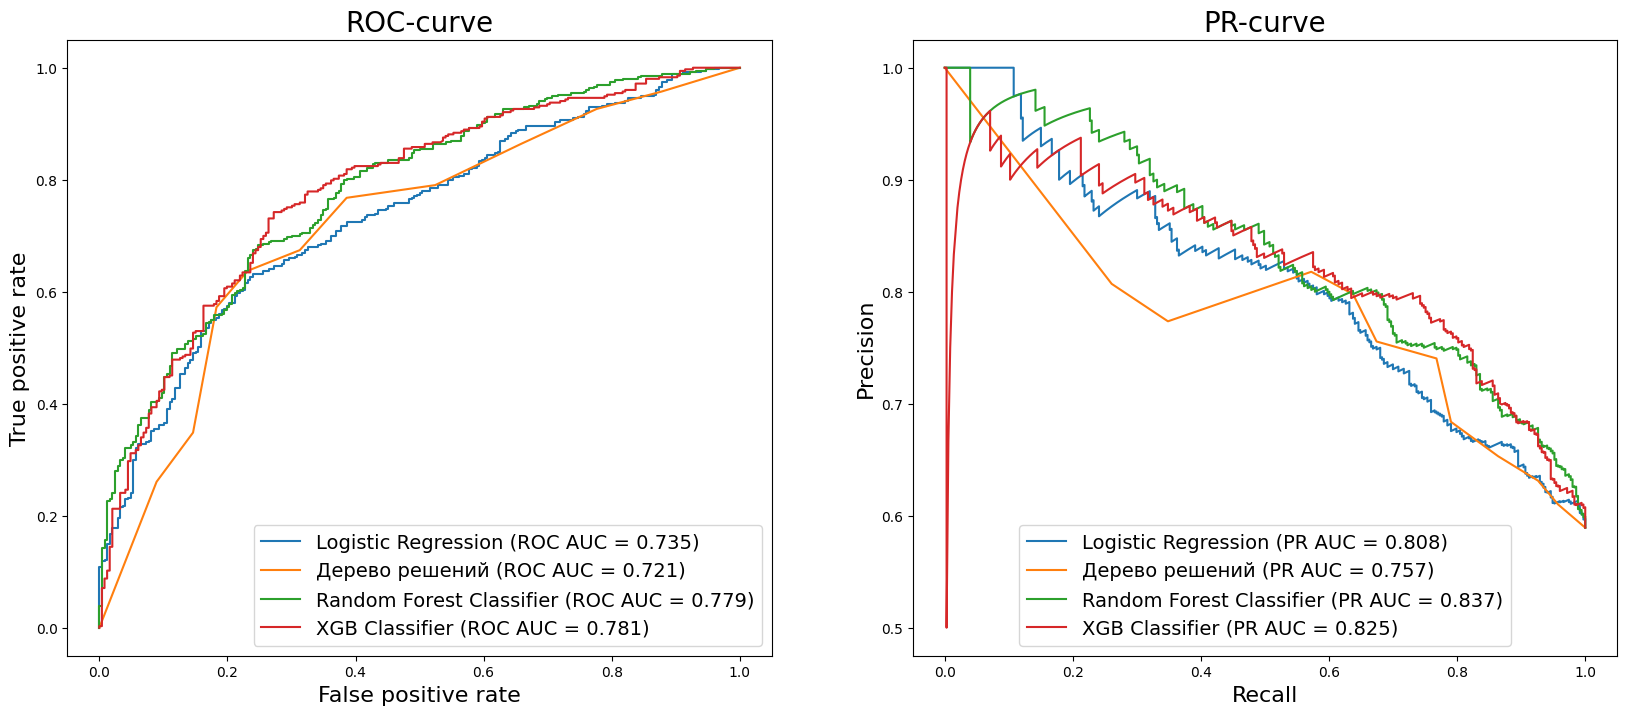

In [145]:
plot_roc_pr_curves(y_test, proba_for_curves)

# 7. Заключение

## Сформулируйте выводы на основе полученных результатов и дайте рекомендации по дальнейшим шагам в исследовании или практике

> наиболее точной моделью оказалась Random Forest Classifier, самой важной фичей во многих моделях было значение CRP, однако для логистической регрессии набор важных признаков более соответствует клинической практике; 
>
> данную модель можно использовать, для предсказания развития аппендицита у детей в условиях ограниченной инструментальной диагносики